# Mini Project 1

### Anthropogenic climate change is a real and pressing issue that the whole world is facing. It is important to understand why climate changes under normal circumstances and how it is changing differently now. The following images and plots will help describe how our climate is changing and the role that humans are playing.

Author: James Milward
<img src="https://hips.hearstapps.com/hmg-prod/images/gettyimages-1442849073-648c673408c0f.jpg" style="margin:auto"/>
[source](https://hips.hearstapps.com/hmg-prod/images/gettyimages-1442849073-648c673408c0f.jpg)

## Data Sources

#### Greenhouse Gases

Data Citation: Keeling, Ralph F; Keeling, Charles D. (2017). Atmospheric Monthly
In Situ CO2 Data - Mauna Loa Observatory, Hawaii (Archive 2023-06-04). In
Scripps CO2 Program Data. UC San Diego Library Digital Collections.
https://doi.org/10.6075/J08W3BHW.

Data Citation: Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2
determined from NOAA Global Monitoring Laboratory measurements. Version 2023-
09 https://doi.org/10.15138/9N0H-ZH07

Data Citation: https://library.wmo.int/records/item/58743-no-18-26-october-2022

Data Citation: Lan, X., K.W. Thoning, and E.J. Dlugokencky: Trends in globally-averaged
CH4, N2O, and SF6 determined from NOAA Global Monitoring Laboratory
measurements. Version 2023-09, https://doi.org/10.15138/P8XG-AA10

Data Citation: https://library.wmo.int/records/item/58743-no-18-26-october-2022

#### Carbon Emission Datasets

Data Citation: Global Carbon Project. (2022). Supplemental data of Global Carbon
Budget 2022 (Version 1.0) [Data set]. Global Carbon Project.
https://doi.org/10.18160/gcp-2022

# Importing Packages

#### The following libraries will be used throughout the document for computations and plotting

In [1]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import cm
from matplotlib import colormaps as colormap

# Set up image format so that plots and pictures look presentable

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = 12,6

# Read in all data that will be used throughout the document

In [3]:
co2_maunaloa = pd.read_csv('./data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
co2_noaa = pd.read_csv('./data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
co2_wdcgg = pd.read_csv('./data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])

In [4]:
noaa_ch4 = pd.read_csv('./data/greenhouse_gases/NOAA_CH4.csv')
wdcgg_n2o = pd.read_csv('./data/greenhouse_gases/WDCGG_N2O.csv')                                           

calendar_date_noaa_ch4 = pd.to_datetime(noaa_ch4[['Year', 'Month']].assign(day=1))
calendar_date_wdcgg_n2o = pd.to_datetime(wdcgg_n2o[['Year', 'Month']].assign(day=1))

noaa_ch4['Date'] = calendar_date_noaa_ch4
wdcgg_n2o['Date'] = calendar_date_wdcgg_n2o

In [5]:
fossil_fuel_emission_type = pd.read_csv('./data/greenhouse_gases/Fossil_Fuel_Emission_By_Type.csv')
global_carbon_budget = pd.read_csv('./data/greenhouse_gases/Global_C_Budget_2022.csv')
nation_fossil_fuels = pd.read_csv('./data/greenhouse_gases/Nation_Fossil_Fuel_Emissions.csv')

In [6]:
# temps over land and ocean
gmt_temp_berk_earth = pd.read_csv('./data/temp/gmt_Berkeley_Earth.csv')
gmt_temp_era5 = pd.read_csv('./data/temp/gmt_ERA5.csv')
gmt_temp_gistemp = pd.read_csv('./data/temp/gmt_GISTEMP.csv')
gmt_temp_hadcrut5 = pd.read_csv('./data/temp/gmt_HadCRUT5.csv')
gmt_temp_jra55 = pd.read_csv('./data/temp/gmt_JRA-55.csv')
gmt_temp_noaa_globaltemp = pd.read_csv('./data/temp/gmt_NOAAGlobalTemp.csv')

# temps over land
lsat_temps_berk_earth = pd.read_csv('./data/temp/lsat_Berkeley_Earth_Land.csv')
lsat_temps_cutem5 = pd.read_csv('./data/temp/lsat_CRUTEM5.csv')

# temps over ocean
sst_ersstv5 = pd.read_csv('./data/temp/sst_ERSSTv5.csv')
sst_hadsst3 = pd.read_csv('./data/temp/sst_HadSST3.csv')
sst_hadsst4 = pd.read_csv('./data/temp/sst_HadSST4.csv')

# NASA GISS_E2
nasa_giss_response_to_forcing = pd.read_csv('./data/model_results/NASA_GISS_Response_To_Forcings.csv')
nasa_giss_observed_temps = pd.read_csv('./data/model_results/Observed_Temps.csv')

# <font color='red'>1. Steady State Climate Conditions</font> 

#### In the simplest of terms, the sun controls the Earth's temperature.

#### In a steady-state climate, the Earth's energy budget is in "radiative balance".

<img src="https://www.calacademy.org/sites/default/files/styles/manual_crop_standard_960x540/public/uploads/images/earthenergybalance-fullpicture1200x900.png?itok=4v__oLBW&c=4874a7bbdf86685ab5d0739c7f1896c1" width="800" style="margin:auto"/>

<center> Source:(https://www.epa.gov/ghgemissions/overview-greenhouse-gases)

# <font color='red'>2. Role of Greenhouse Gases</font> 

#### As the graphic above demonstrates, when the sun emits shortwave radiation, some get reflected by the atmosphere and some passes through to the Earth's surface. Some of this gets reflected by the Earth as longwave radiation, which can't pass through the atmosphere as easily. Greenhouses gases in the atmosphere trap longwave radiation which warms the atmosphere.

#### Greenhouse gases are the reasons temperatures on Earth are suitable for humans. Overconsumption of fossil fuels and deforestation are two ways humans are contributing to the unprecedented rise in greenhouse gases, particulalry CO2.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Sun-Earth_Logarithmic_Spectrums_with_Accurate_Scaling.svg" width="800" style="margin:auto"/>

<center> Fig. 2. Source:(https://upload.wikimedia.org/wikipedia/commons/9/96/Sun-Earth_Logarithmic_Spectrums_with_Accurate_Scaling.svg) </center>

#### <center> A greenhouse gas (e.g., CO2 or CH4) is different from a regular gas in the atmosphere (e.g., Oxygen or Nitrogen) because of the way it interacts with infrared. Greenhouse gases have a "dipole moment," which essentially means the different charges of the atoms (Carbon vs. Hydrogen) cause the individual molecules of the greenhouse gases to vibrate when interacting with infrared. While incoming solar radiation is in the visibile light spectrum, outgoing longwave radiation is infrared. Greenhouse gases absorb this infrared and re-emit some of it back toward Earth. </center>

# <font color='red'>3 & 4. Increases in Greenhouse Gases</font> 

#### The increase in greenhouse gases since the industrial revolution is one of the clearest pieces of evidence that anthropogenic forces are behind current warming climate trends.

#### Since prior to the inustrial revolution, CO2 concentrations have increased by about 49% and N2O concentrations have increased by about 19%.

#### CH4 contrations have seen the largest increase at about 173%
(Reference the following calculation)

In [7]:
# select only 2022 values and average those values for each dataset
co2_2022 = co2_noaa['NOAA CO2 (ppm)'][516:527].mean()
ch4_2022 = noaa_ch4['NOAA CH4 (ppb)'][462:473].mean()

# only goes up to the end of 2021
n2o_2022 = wdcgg_n2o['WDCGG N2O (ppb)'][444:455].mean()

# compute the percent different from each average
co2_perc_inc = ((co2_2022 - 280) / 280)*100
ch4_perc_inc = ((ch4_2022 - 700) / 700)*100
n2o_perc_inc = ((n2o_2022 - 280) / 280)*100

# print results
print(f'CO2 has increased by {round(co2_perc_inc,2)}%,\nCH4 has increased by {round(ch4_perc_inc,2)}%,\nN2O has increased by {round(n2o_perc_inc,2)}%')

CO2 has increased by 48.89%,
CH4 has increased by 172.98%,
N2O has increased by 19.44%


# <font color='red'>5. CO2 over the last 800ky</font> 

#### CO2 concentrations have been between about 180 ppm to 280, with one short period of time reaching about 300 ppm more 300 thousand years ago.

#### Proxies are used to determine these values. One example of a proxy is an ice core. The air bubbles in an ice core can be used to determine atmospheric conditions at the time the ice froze. Corals and foraminifera are marine organisms that record paleo-conditions and are commonly used as proxies.

<img src="https://icecores.org/sites/default/files/2018-02/WAIS_ICECORE-HR.jpg" width="800" style="margin:auto"/>

<center> Fig 3. Source: https://icecores.org/sites/default/files/2018-02/WAIS_ICECORE-HR.jpg </center>

# <font color='red'>6 & 11. Seasonal FLuctiuations in CO2</font> 

#### CO2 has been increased steadily over the last 150+ years. While the overal trend during that time has been increasing, there are some obvious short decreases in CO2 each year. 

#### Global CO2 fluctutes seasonally in correspondance to the northern hemisphere (NH). During the NH's Spring/Summer, the increase in plant growth acts to draw down CO2. As plants die off in the Fall/Winter, less CO2 is drawn out of the atmosphere.

#### The amount of CO2 drawn down by plants in the growing season is never high enough to balance what the atmosphere gains in the off-season. This is why the longterm trend for CO2 is growing.

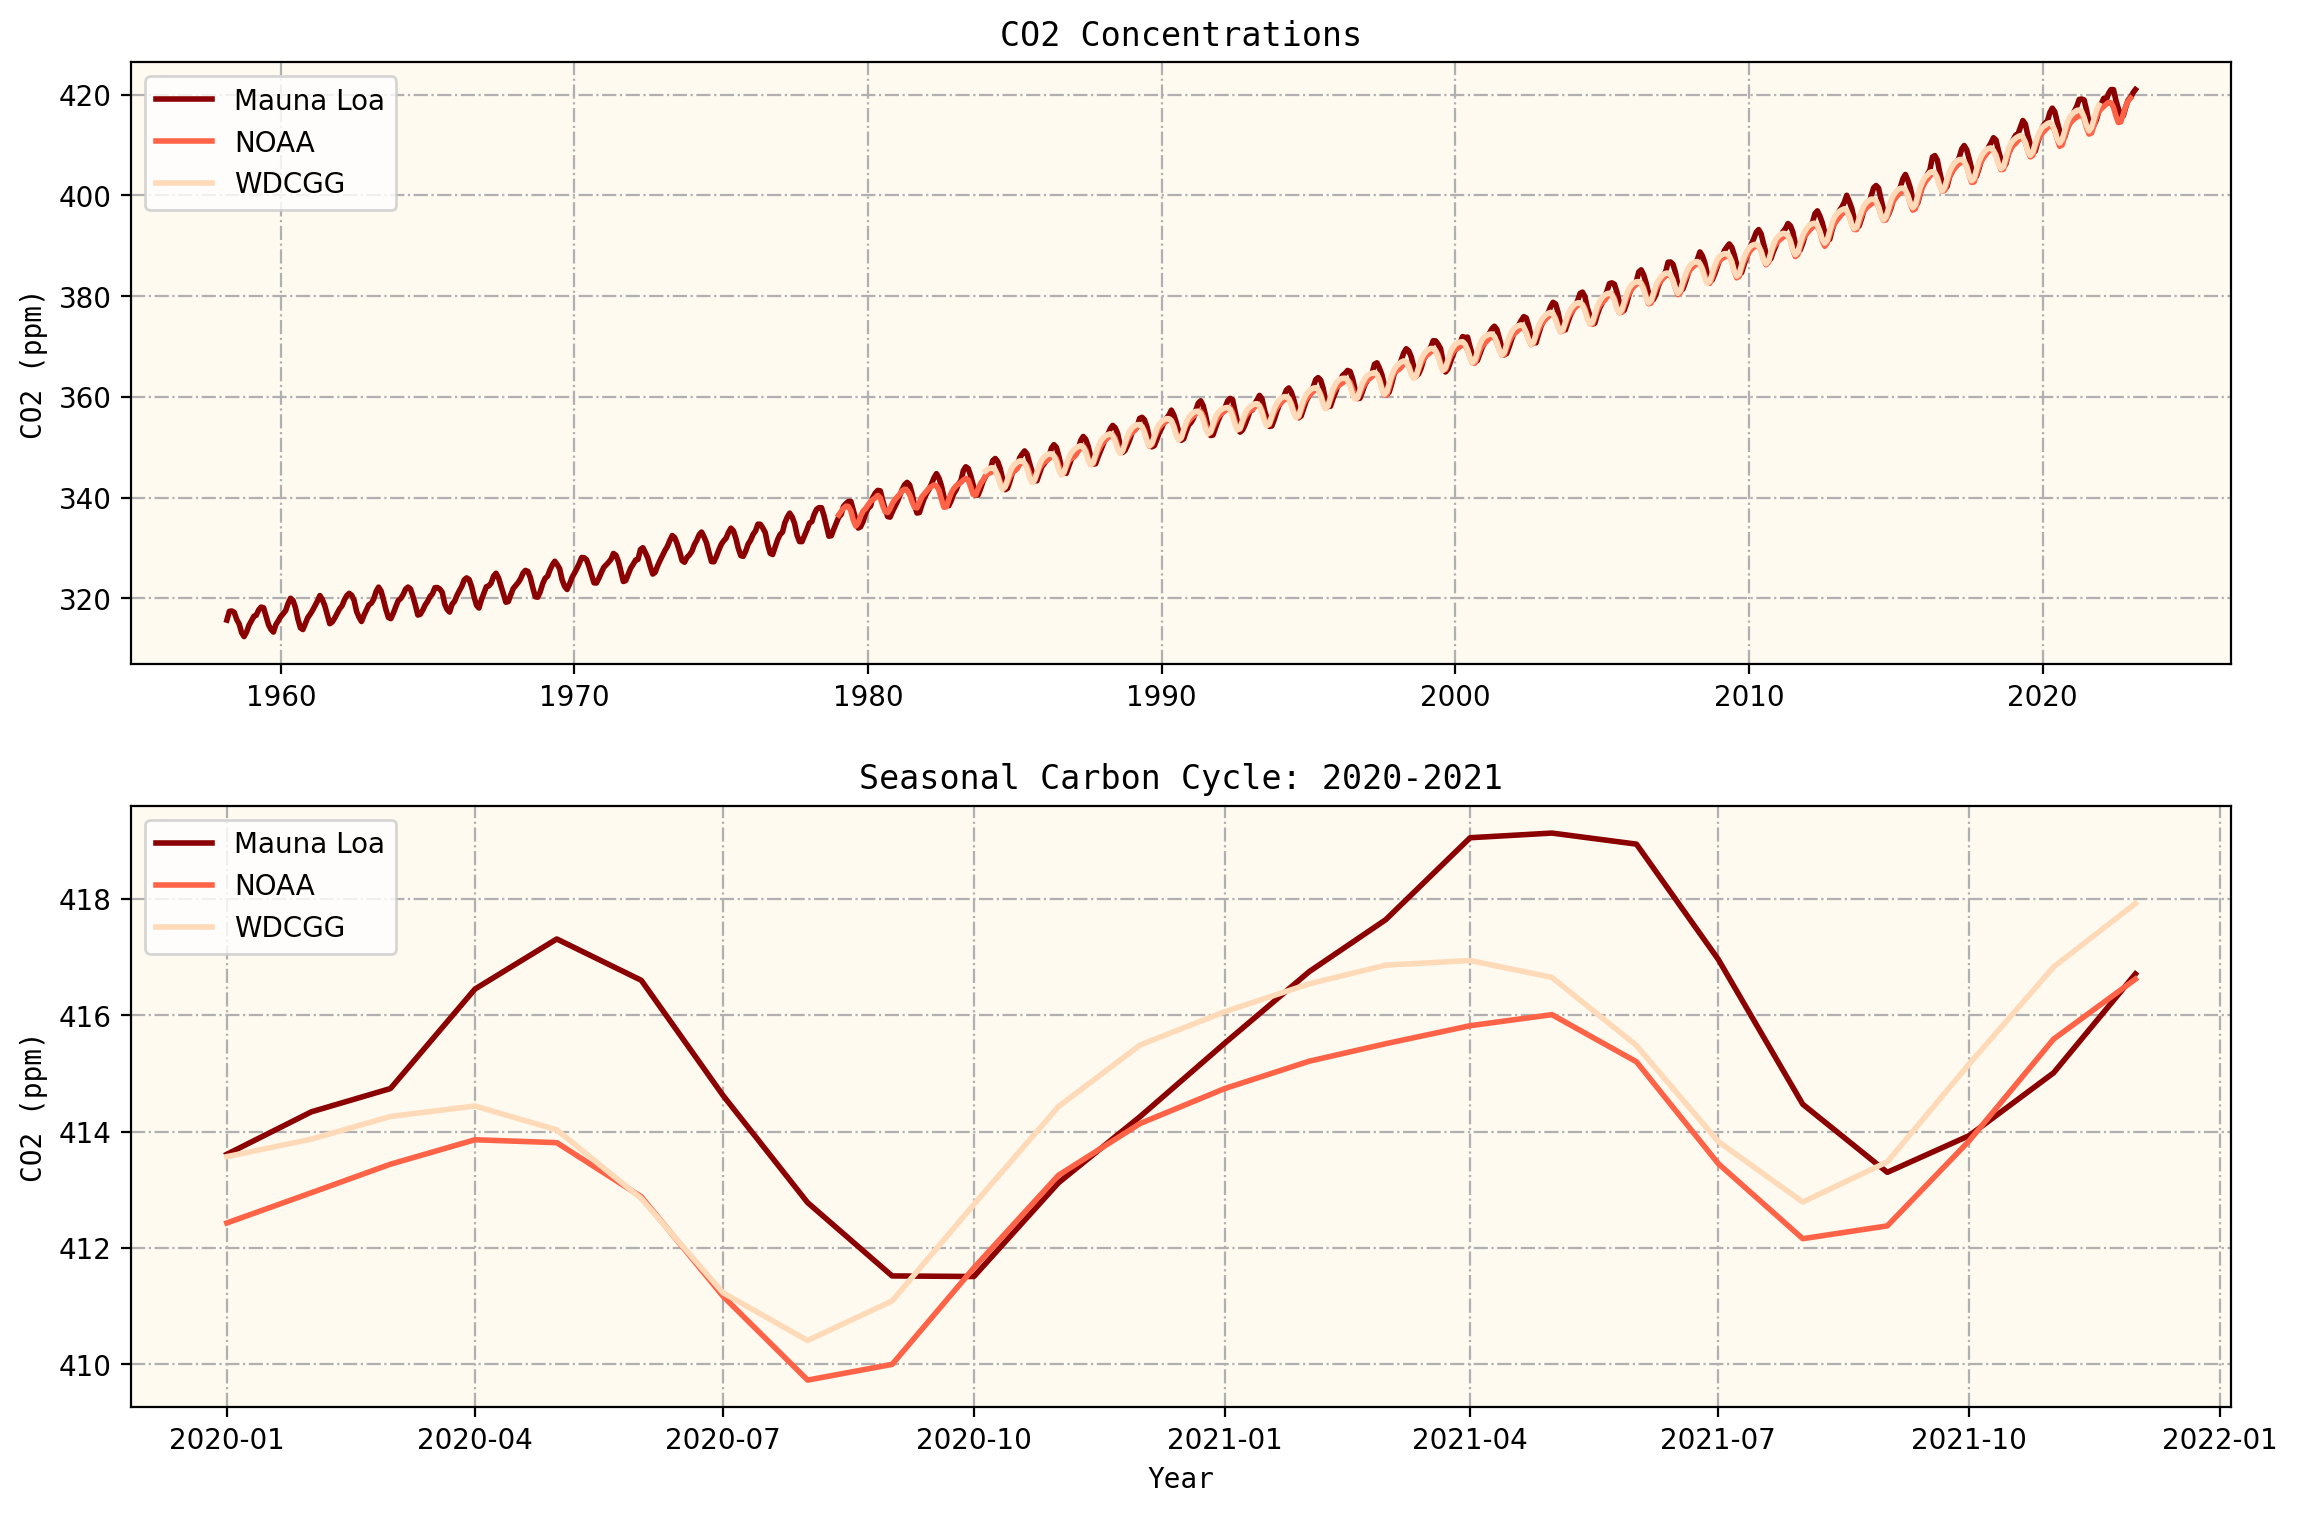

In [8]:
fig, ax = plt.subplots(nrows=2, figsize = (12, 8))

# select co2 values from all three datsets to plot

ax[0].plot(co2_maunaloa['Date'], co2_maunaloa['Mauna Loa CO2 (ppm)'], label='Mauna Loa',
       linewidth=2, color='darkred')

ax[0].plot(co2_noaa['Date'], co2_noaa['NOAA CO2 (ppm)'], label= 'NOAA',
       linewidth=2, color='tomato')

ax[0].plot(co2_wdcgg['Date'], co2_wdcgg['WDCGG CO2 (ppm)'], label = 'WDCGG',
       linewidth=2, color='peachpuff')

ax[0].set_facecolor("floralwhite")

## plot a legend on the ax
ax[0].legend()

## add plot title:
ax[0].set_title('CO2 Concentrations', fontname='monospace')

## add axes labes:
ax[0].set_ylabel('CO2 (ppm)', fontname='monospace')
# ax[0].set_xlabel('Year', fontname='monospace')

ax[0].grid(linestyle='-.')

# set spacing between ax 1 and 2
fig.tight_layout(pad=3)

## Set up second plot, but select only for 2020-2021 to show seasonal CO2 fluctuations

ax[1].plot(co2_maunaloa['Date'][742:766], co2_maunaloa['Mauna Loa CO2 (ppm)'][742:766], label='Mauna Loa',
       linewidth=2, color='darkred')

ax[1].plot(co2_noaa['Date'][492:516], co2_noaa['NOAA CO2 (ppm)'][492:516], label= 'NOAA',
       linewidth=2, color='tomato')

ax[1].plot(wdcgg_n2o['Date'][432:467], co2_wdcgg['WDCGG CO2 (ppm)'][432:467], label = 'WDCGG',
       linewidth=2, color='peachpuff')

ax[1].set_facecolor("floralwhite")

## plot a legend on the ax
ax[1].legend()

## add plot title:
ax[1].set_title('Seasonal Carbon Cycle: 2020-2021', fontname='monospace')

## add axes labes:
ax[1].set_ylabel('CO2 (ppm)', fontname='monospace')
ax[1].set_xlabel('Year', fontname='monospace')

ax[1].grid(linestyle='-.')

#### <center> Fig 4. This plot shows both the longterm trend of increasing CO2 as well as the seasonal cycle. Each dataset contains monthly CO2 levels. We can see that in the northern hemisphere Spring/Summer, there is a decrease in CO2 that coincides with the growth of plants. Around November, once a significant portion of plant life is lost, the CO2 levels increase again. </center>

#### <center> The slight shift in both concentration and seasonality between the three datasets is a product how the data are collected. The second plot demonstrates that the data from Mauna Loa are out of sync compared to the data from NOAA. This is because the Mauna Loa record is a record of in situ measurements taken in the Northern Hemisphere. The records from NOAA and WDCGG are both global averages from a network monitors, and therefore have a weaker signal of seasonality. </center>

# <font color='red'>7. Sources of Greenhouse Gases</font>  ([EPA](https://www.epa.gov/ghgemissions/overview-greenhouse-gases))

#### As of 2021, the primary anthropogenic source of CH4 is Natural Gas and Petroleum Systems (29%) followed by Enteric Fermentation/Livestock (25%).
#### The primary anthropogenic source of CO2 is Transportation (35%) followed by Electric Power (31%).
#### The primary anthropogenic source of N2O is Agricultural Soil Management (73%).

<img src="https://www.epa.gov/system/files/images/2023-04/gases-by-ch4-2023-caption.png" width="300" style="margin:auto"/>

## <center> source: [CH4](https://www.epa.gov/system/files/images/2023-04/gases-by-ch4-2023-caption.png) </center>

<img src="https://www.epa.gov/system/files/images/2023-04/gases-by-co2-2023-caption.png" width="300" style="margin:auto"/>

## <center> source: [CO2](https://www.epa.gov/system/files/images/2023-04/gases-by-co2-2023-caption.png) </center>

<img src="https://www.epa.gov/system/files/images/2023-04/gases-by-n2o-2023-caption.png" width="300" style="margin:auto"/>

## <center> source: [N2O](https://www.epa.gov/system/files/images/2023-04/gases-by-n2o-2023-caption.png) </center>

#### <center>Fig 5. Considering only CH4, CO2, and N2O, the strongest greenhouse gas is N2O. N2O causes about 265 times more warming than an equal volume of CO2. CH4 is causes about 28 times more warming than CO2. CO2 has more of an impact in our atmosphere, however, because it is present in much higher quanitities and because it lasts longer in the atmosphere.</center>

# <font color='red'>8. Longterm Trends in Greenhouse Gases</font> 

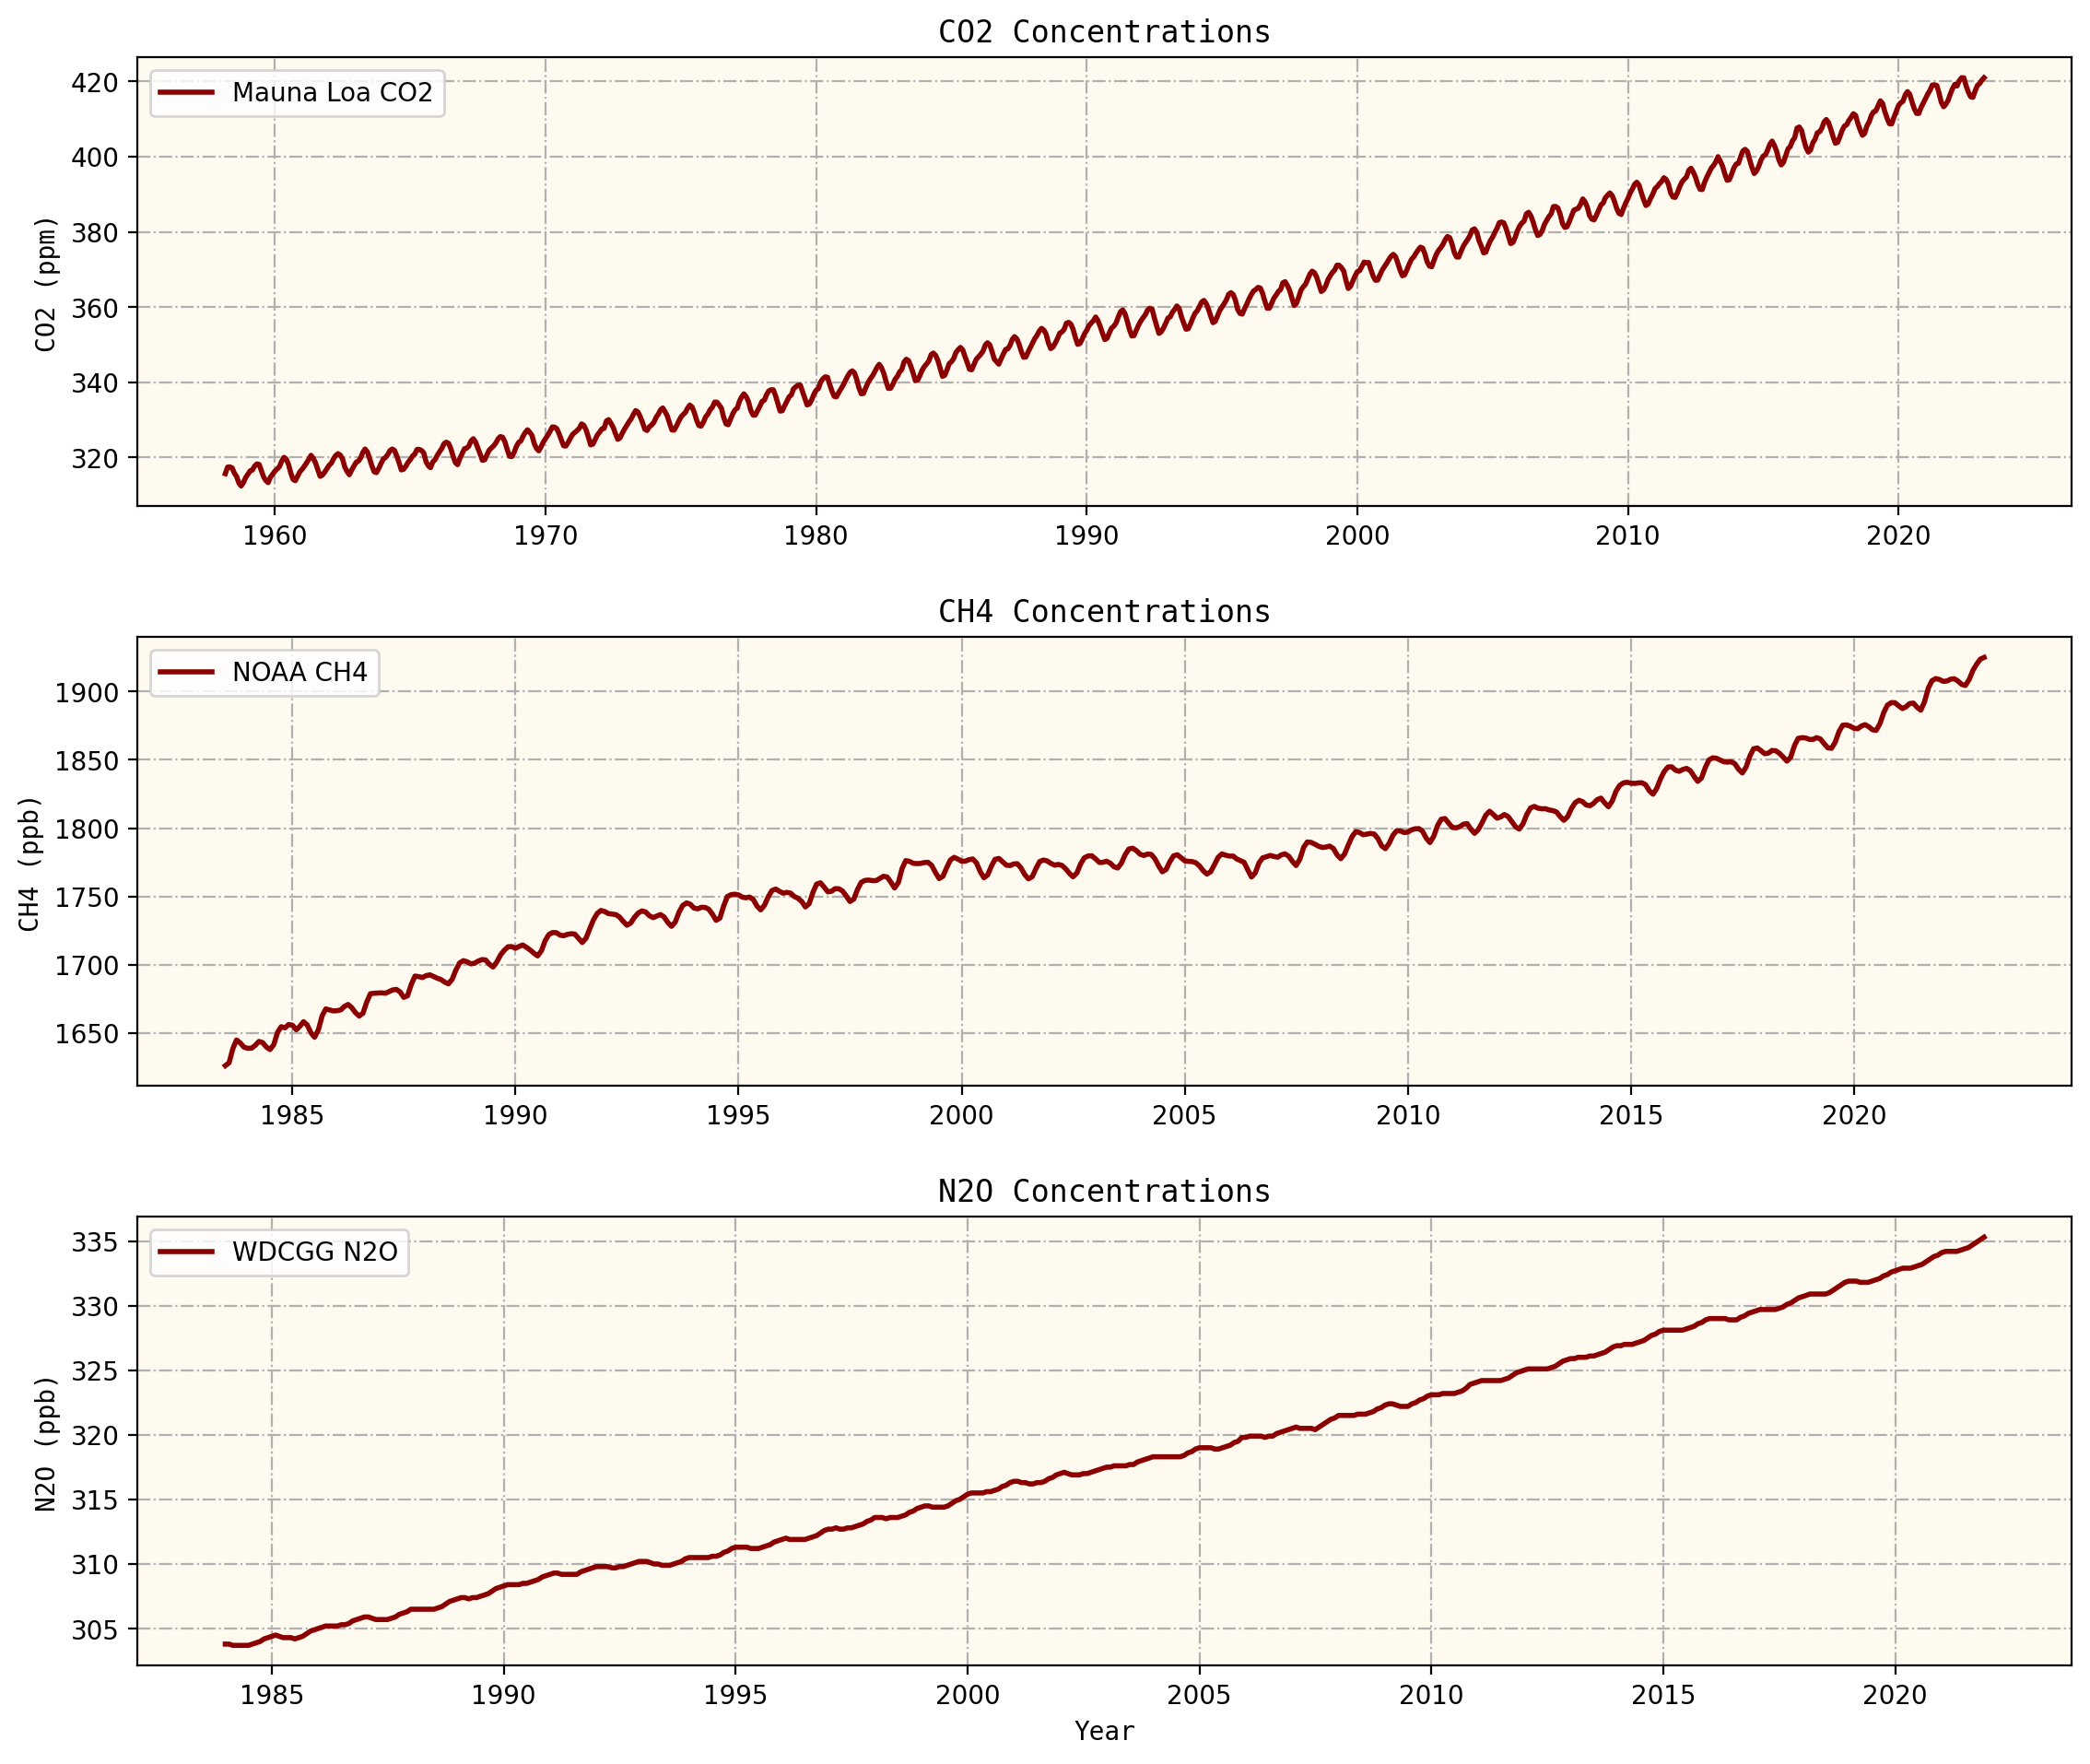

In [9]:
fig, ax = plt.subplots(nrows=3, figsize = (12, 10))

# select co2 values from all three datsets to plot

ax[0].plot(co2_maunaloa['Date'], co2_maunaloa['Mauna Loa CO2 (ppm)'], label='Mauna Loa CO2',
       linewidth=2, color='darkred')

ax[0].set_facecolor("floralwhite")

## plot a legend on the ax
ax[0].legend()

## add plot title:
ax[0].set_title('CO2 Concentrations', fontname='monospace')

## add axes labes:
ax[0].set_ylabel('CO2 (ppm)', fontname='monospace')
# ax[0].set_xlabel('Year', fontname='monospace')

ax[0].grid(linestyle='-.')

# set spacing between ax 1 and 2
fig.tight_layout(pad=3)

## Set up second plot, but select only for 2020-2021 to show seasonal CO2 fluctuations

ax[1].plot(noaa_ch4['Date'], noaa_ch4['NOAA CH4 (ppb)'], label='NOAA CH4',
       linewidth=2, color='darkred')

ax[1].set_facecolor("floralwhite")

## plot a legend on the ax
ax[1].legend()

## add plot title:
ax[1].set_title('CH4 Concentrations', fontname='monospace')

## add axes labes:
ax[1].set_ylabel('CH4 (ppb)', fontname='monospace')
# ax[1].set_xlabel('Year', fontname='monospace')

ax[1].grid(linestyle='-.')


ax[2].plot(wdcgg_n2o['Date'], wdcgg_n2o['WDCGG N2O (ppb)'], label='WDCGG N2O',
       linewidth=2, color='darkred')

ax[2].set_facecolor("floralwhite")

## plot a legend on the ax
ax[2].legend()

## add plot title:
ax[2].set_title('N2O Concentrations', fontname='monospace')

## add axes labes:
ax[2].set_ylabel('N2O (ppb)', fontname='monospace')
ax[2].set_xlabel('Year', fontname='monospace')

ax[2].grid(linestyle='-.')

#### Fig 6. The above plots show the longterm trends of CO2, CH4, and N2O, respectively. There is some seasonal variability present, but the overall trend for all three greenhouse gases is increasing. In CO2 and N2O, this increase is constant and relatively linear or accelerating.

#### The plot for CH4, however, shows near plateau from about 2000-2007, which is not present in either of the other plots. It is unknown exactly what caused this plateau, but CH4 concentrations have increased drastically since the end of the plateau. [source](https://www.climate.gov/news-features/understanding-climate/after-2000-era-plateau-global-methane-levels-hitting-new-highs) </center>

# <font color='red'>9. Top Greenhouse Gas Emitting Countries</font> 

Text(0.5, 1.0, 'Top Contributors to\nCarbon Emissions: 2021')

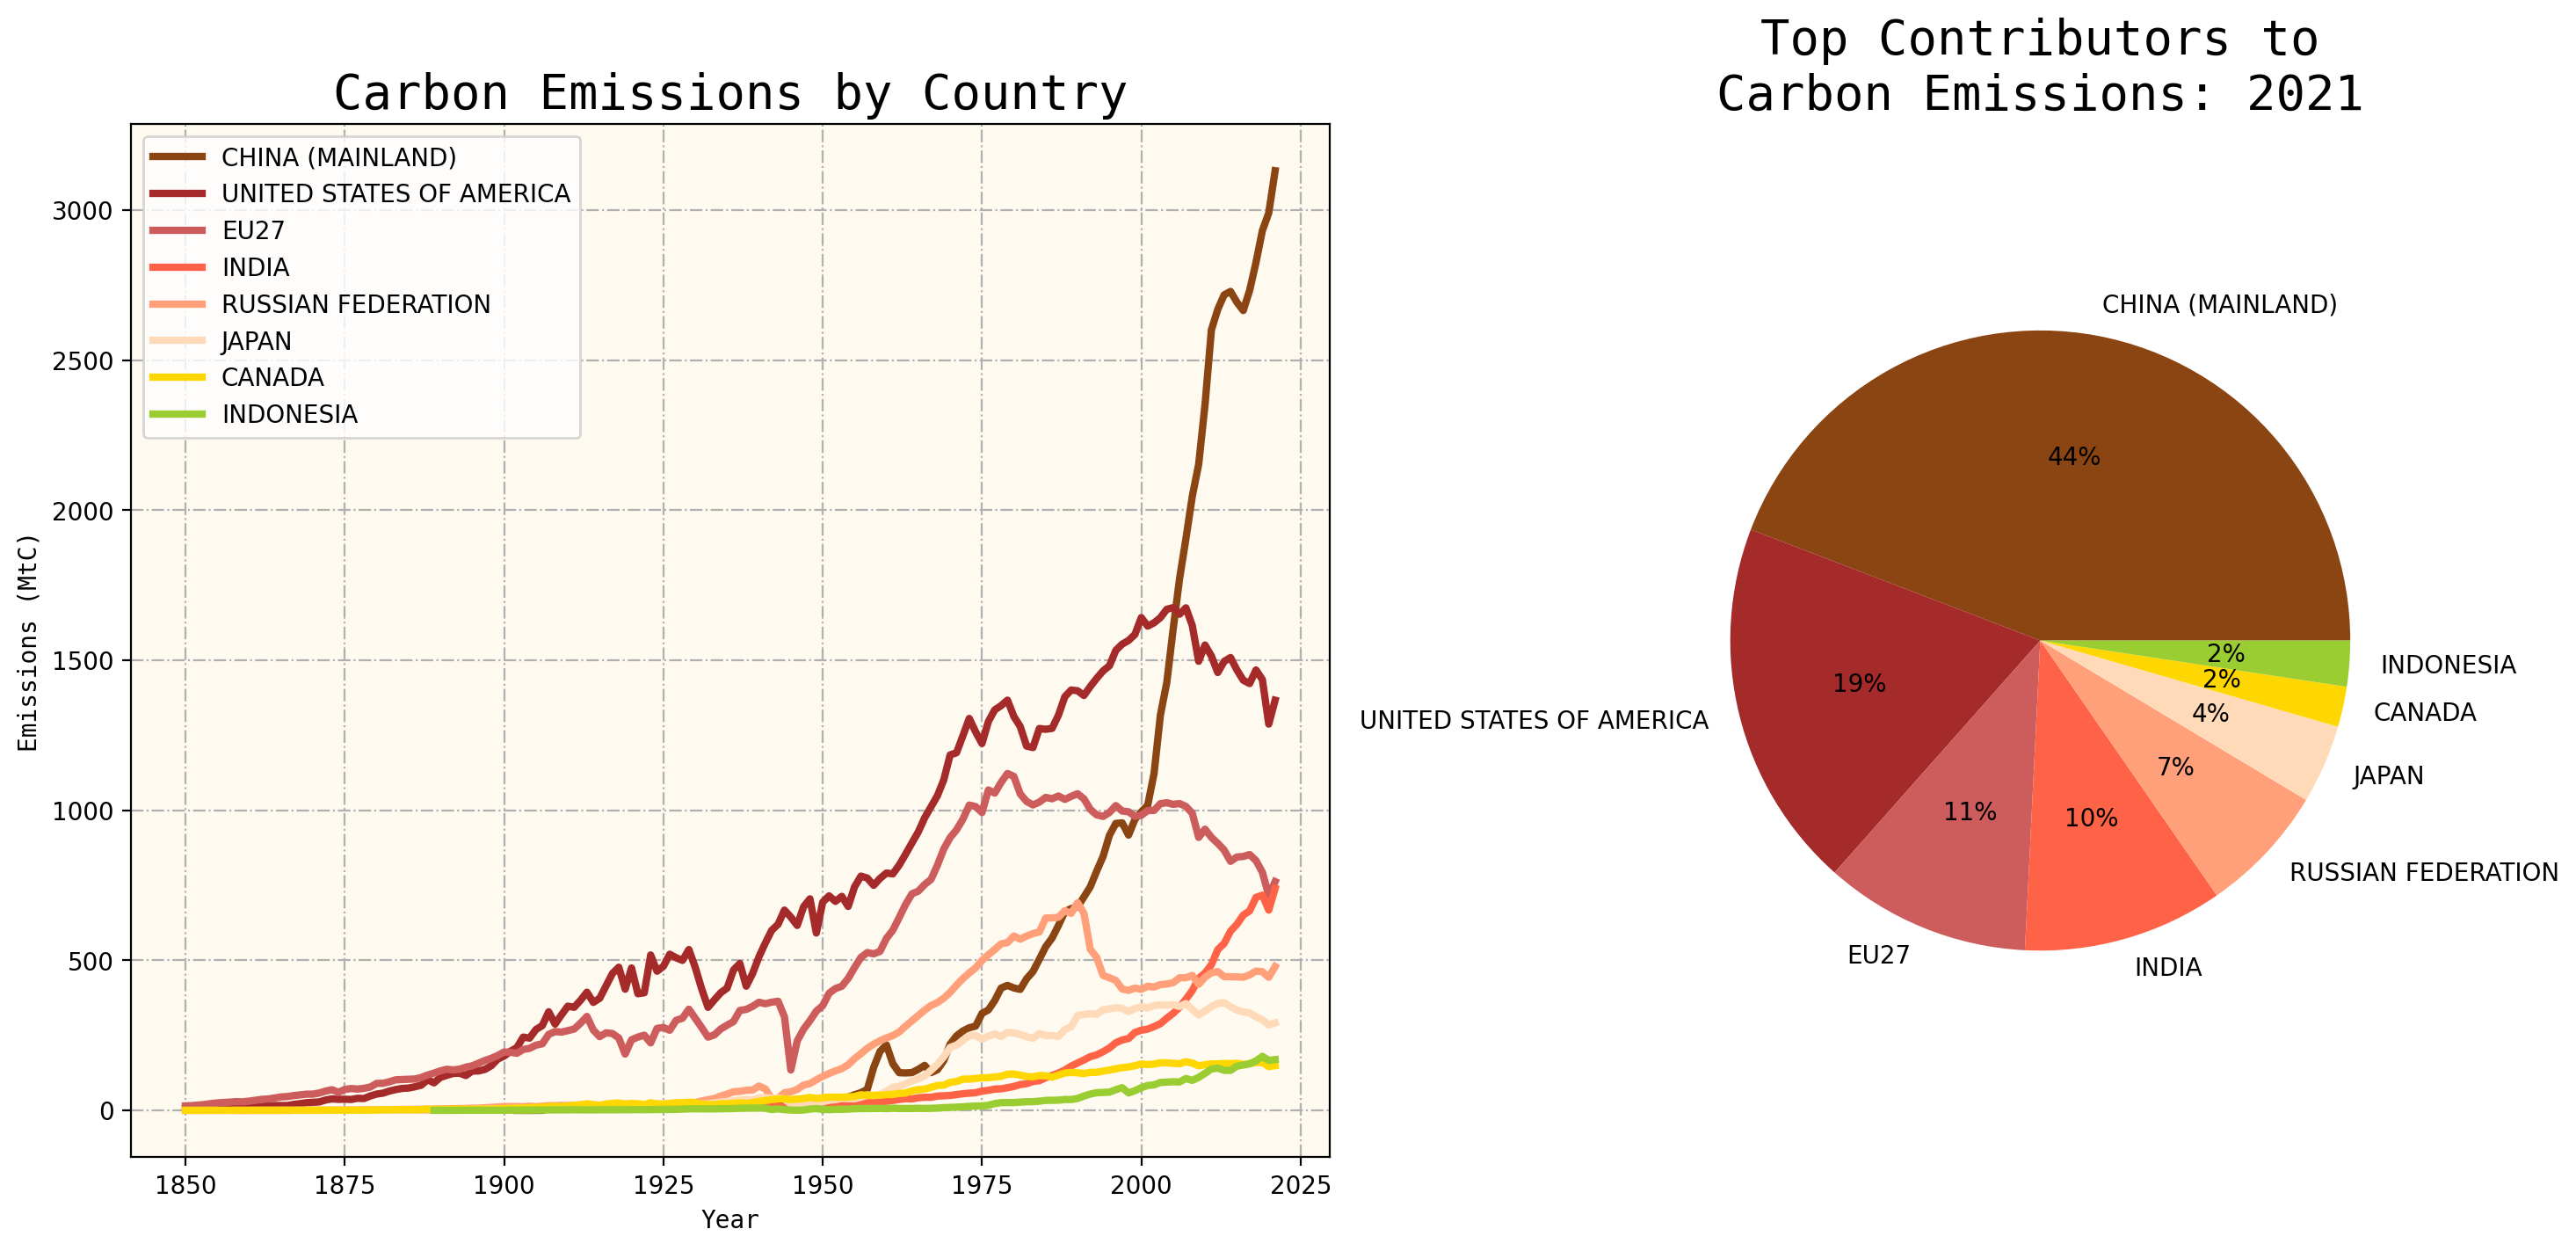

In [21]:
# list of countries and colors to loop/index through
countries = ['CHINA (MAINLAND)', 'UNITED STATES OF AMERICA', 'EU27', 'INDIA', 'RUSSIAN FEDERATION', 'JAPAN', 'CANADA', 'INDONESIA']


colors = ['saddlebrown', 'brown', 'indianred', 'tomato', 'lightsalmon', 'peachpuff', 'gold', 'yellowgreen']

fig, ax = plt.subplots(ncols=2, figsize=(15,7), layout='constrained')

# Empty list to add values to from for loop in order to make pie chart
pie_values = []

# loop through countries to get pie chart values
for i, country in enumerate(countries):
    v = (nation_fossil_fuels[country][171])
    pie_values.append(v)

    ax[0].plot(nation_fossil_fuels['Year'], nation_fossil_fuels[country], label=country, color=colors[i], linewidth=3)

ax[0].set_facecolor("floralwhite")

ax[0].legend()

ax[0].set_title('Carbon Emissions by Country', fontsize=20, fontname='monospace')

ax[0].set_ylabel('Emissions (MtC)', fontname='monospace')

ax[0].set_xlabel('Year', fontname='monospace')

ax[0].grid(linestyle='-.')
    
ax[1].pie(pie_values, labels=countries, colors=colors, labeldistance=1.1, radius=.75, autopct='%.0f%%',)

ax[1].set_title('Top Contributors to\nCarbon Emissions: 2021', fontsize=20, fontname='monospace')

#### <center> Fig 7. The two plot above display the total greenhouse gas emissions in gigatons by the top 7 countries plus the 27 European nations. The plot on left shows how each countries total emissions have risen since 1850. The pie chart on the right shows the percentage of greenhouse gas emissions from each country (or EU27 nation) in 2021. The total is only based on those included in the plot, not the total greenhouse gas emissions from the rest of the world. [data source](https://doi.org/10.18160/gcp-2022) </center>

# <font color='red'>10. Top Sources of Greenhouse Gas Emissions</font> 

In [23]:
# renaming column so that columns can be used as lables in a loop
new_emission_types = fossil_fuel_emission_type.rename(columns={'Cement.emission (MtC/yr)': 'Cement Emission (MtC/yr)'})

Text(0.5, 1.0, 'Top Contributors to\nCarbon Emissions\nby Type: 2021')

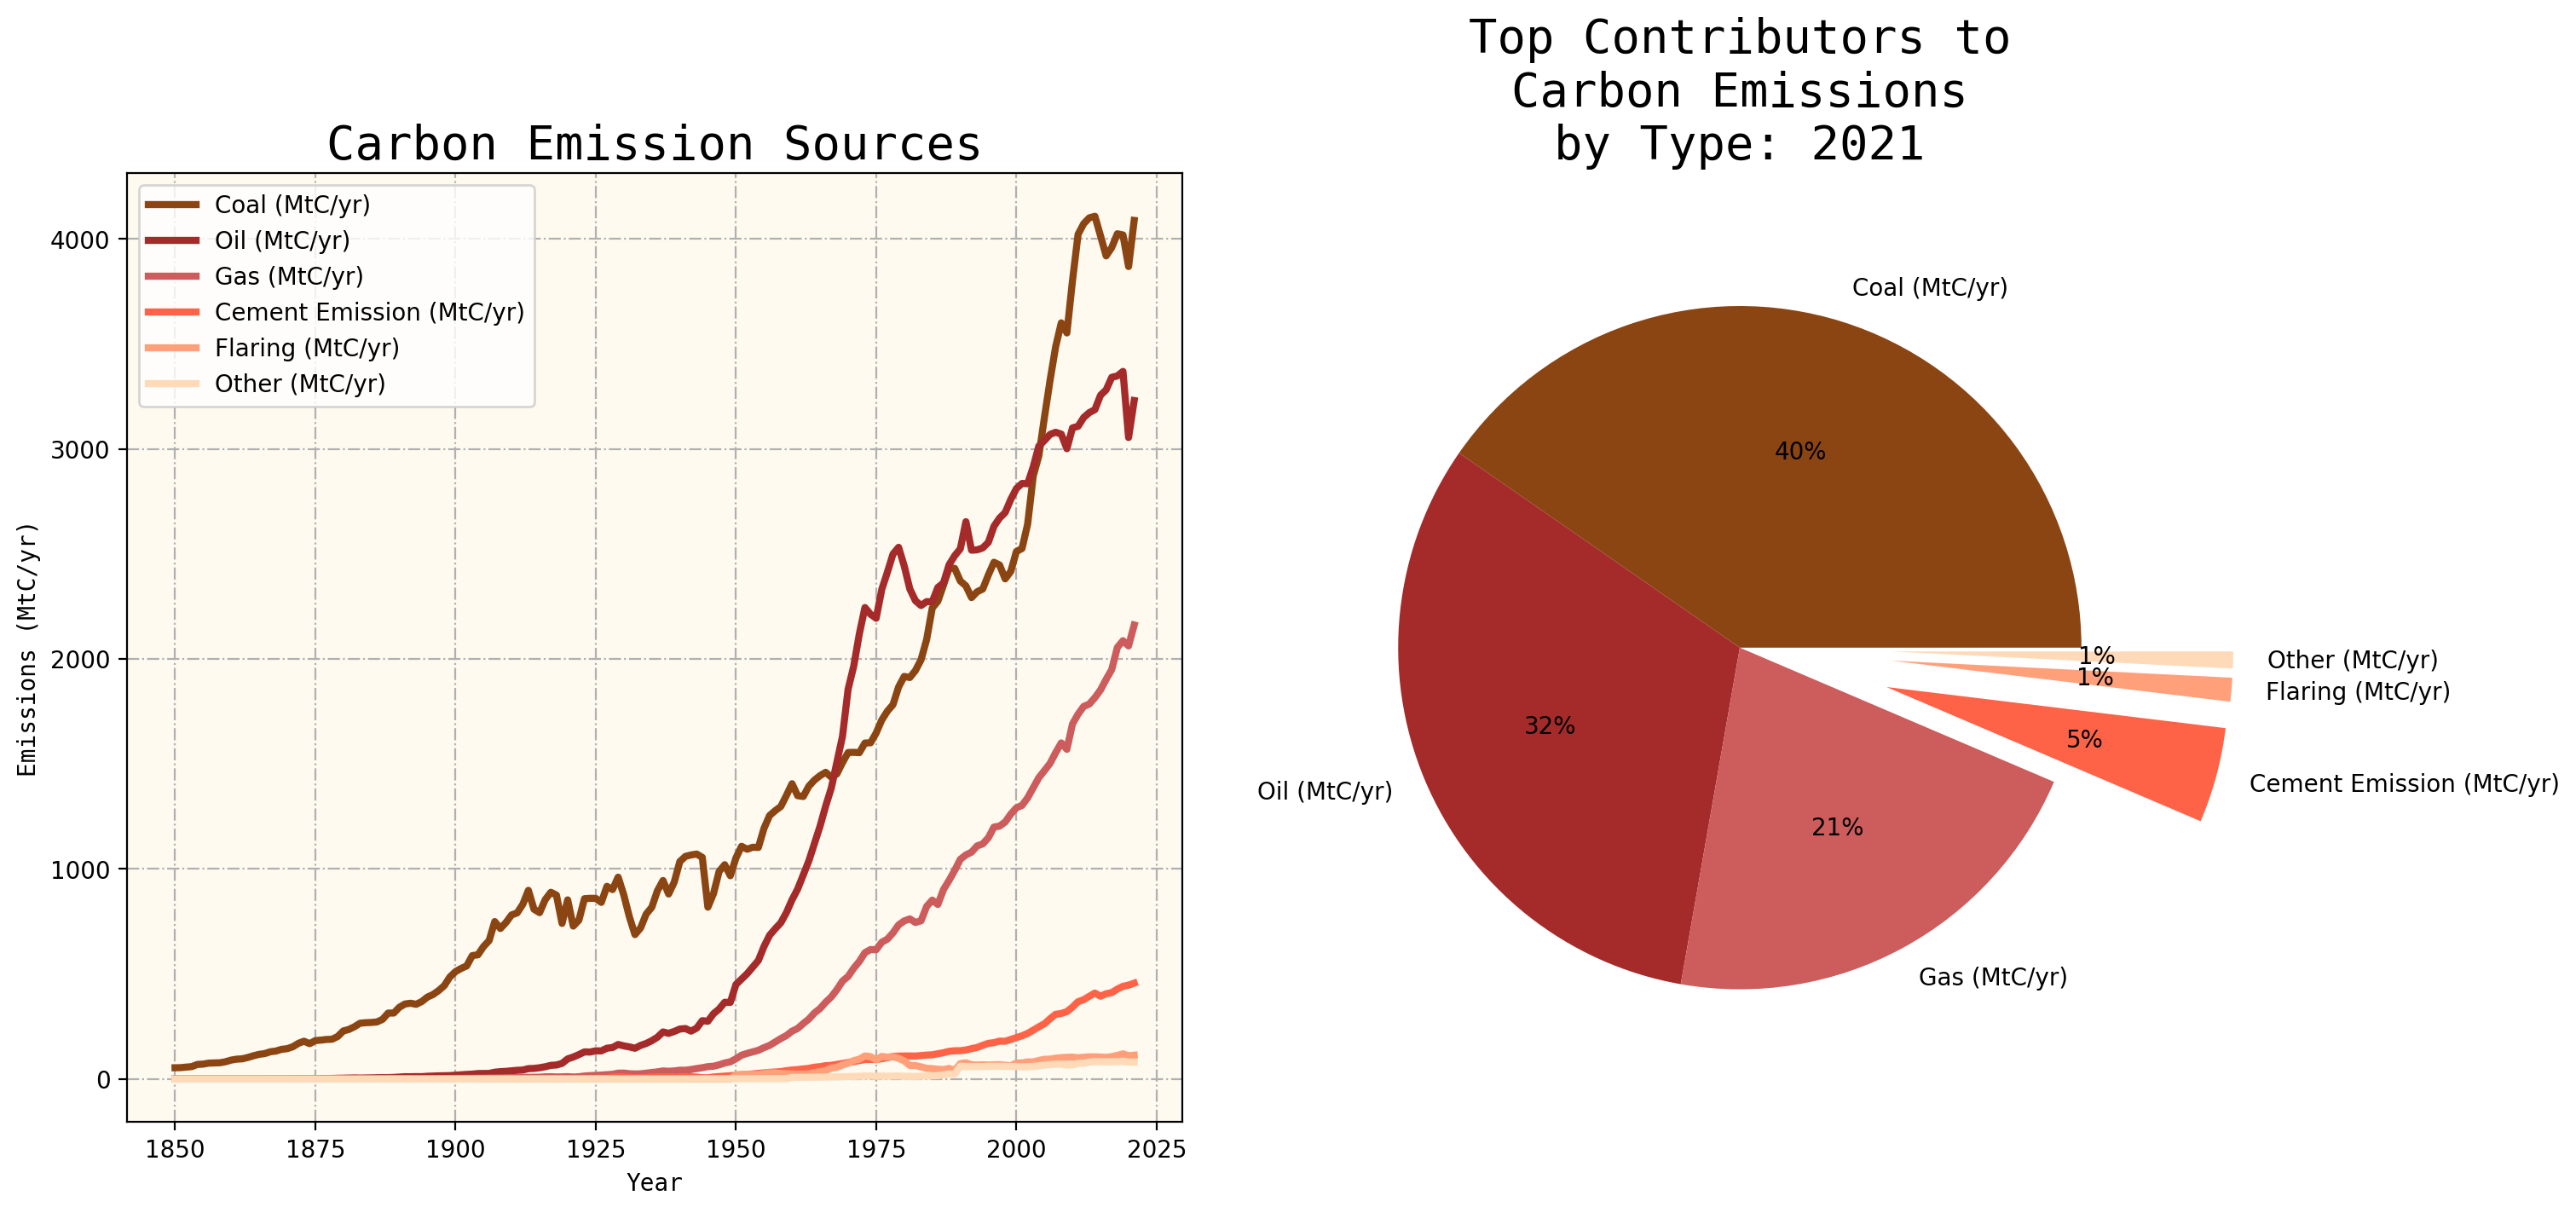

In [22]:
cols = ['Coal (MtC/yr)', 'Oil (MtC/yr)', 'Gas (MtC/yr)',
                          'Cement Emission (MtC/yr)', 'Flaring (MtC/yr)', 'Other (MtC/yr)']

colors = ['saddlebrown', 'brown', 'indianred', 'tomato', 'lightsalmon', 'peachpuff']
              

fig, ax = plt.subplots(ncols=2, figsize=(15,7), layout='constrained')

pie_values2 = []

for i, col in enumerate(cols):
    v2 = (new_emission_types[col][171])
    pie_values2.append(v2)

    ax[0].plot(new_emission_types['Year'], new_emission_types[col], color=colors[i],label=col, linewidth=3)


ax[0].set_facecolor("floralwhite")

ax[0].legend()

ax[0].set_title('Carbon Emission Sources', fontsize=20, fontname='monospace')

ax[0].set_ylabel('Emissions (MtC/yr)', fontname='monospace')

ax[0].set_xlabel('Year', fontname='monospace')

ax[0].grid(linestyle='-.')
    
ax[1].pie(pie_values2, labels=cols, colors=colors, labeldistance=1.1, radius=.9, autopct='%.0f%%', explode=[0, 0, 0, .4, .4, .4])

ax[1].set_title('Top Contributors to\nCarbon Emissions\nby Type: 2021', fontsize=20, fontname='monospace') 

#### <center> Fig 8. The above plots show the what the top sources of global greenhouse gas emissions are. The plot on the left shows how each opf these sources have evolved since 1850, while the plot on the left shows the percent of greenhouse gases from each type in 2021. </center>

# <font color='red'>12. Global Carbon Budget</font> 

In [25]:
# total emission amount averaged over the full time series
emissions = (global_carbon_budget['fossil emissions excluding carbonation'].mean() + global_carbon_budget['land-use change emissions'].mean() + 
             global_carbon_budget['atmospheric growth'].mean() + global_carbon_budget['ocean sink'].mean() + global_carbon_budget['land sink'].mean()
             + global_carbon_budget['cement carbonation sink'].mean())

# proportion of each emission versus the total emissions
foss_emiss_perc = global_carbon_budget['fossil emissions excluding carbonation'].mean() / emissions * 100
land_use_perc = global_carbon_budget['land-use change emissions'].mean() / emissions * 100
atmos_perc = global_carbon_budget['atmospheric growth'].mean() / emissions * 100
ocean_perc = global_carbon_budget['ocean sink'].mean() / emissions * 100
land_perc = global_carbon_budget['land sink'].mean() / emissions * 100
cement_perc = global_carbon_budget['cement carbonation sink'].mean() / emissions * 100


print(f'Fossil emissions excluding carbonation contribute to {round(foss_emiss_perc)}% of all emissions.\nLand sinks {round(land_perc)}% or all emissions.\nThe ocean sinks {round(ocean_perc)}% of all emissions.')

Fossil emissions excluding carbonation contribute to 41% of all emissions.
Land sinks 15% or all emissions.
The ocean sinks 13% of all emissions.


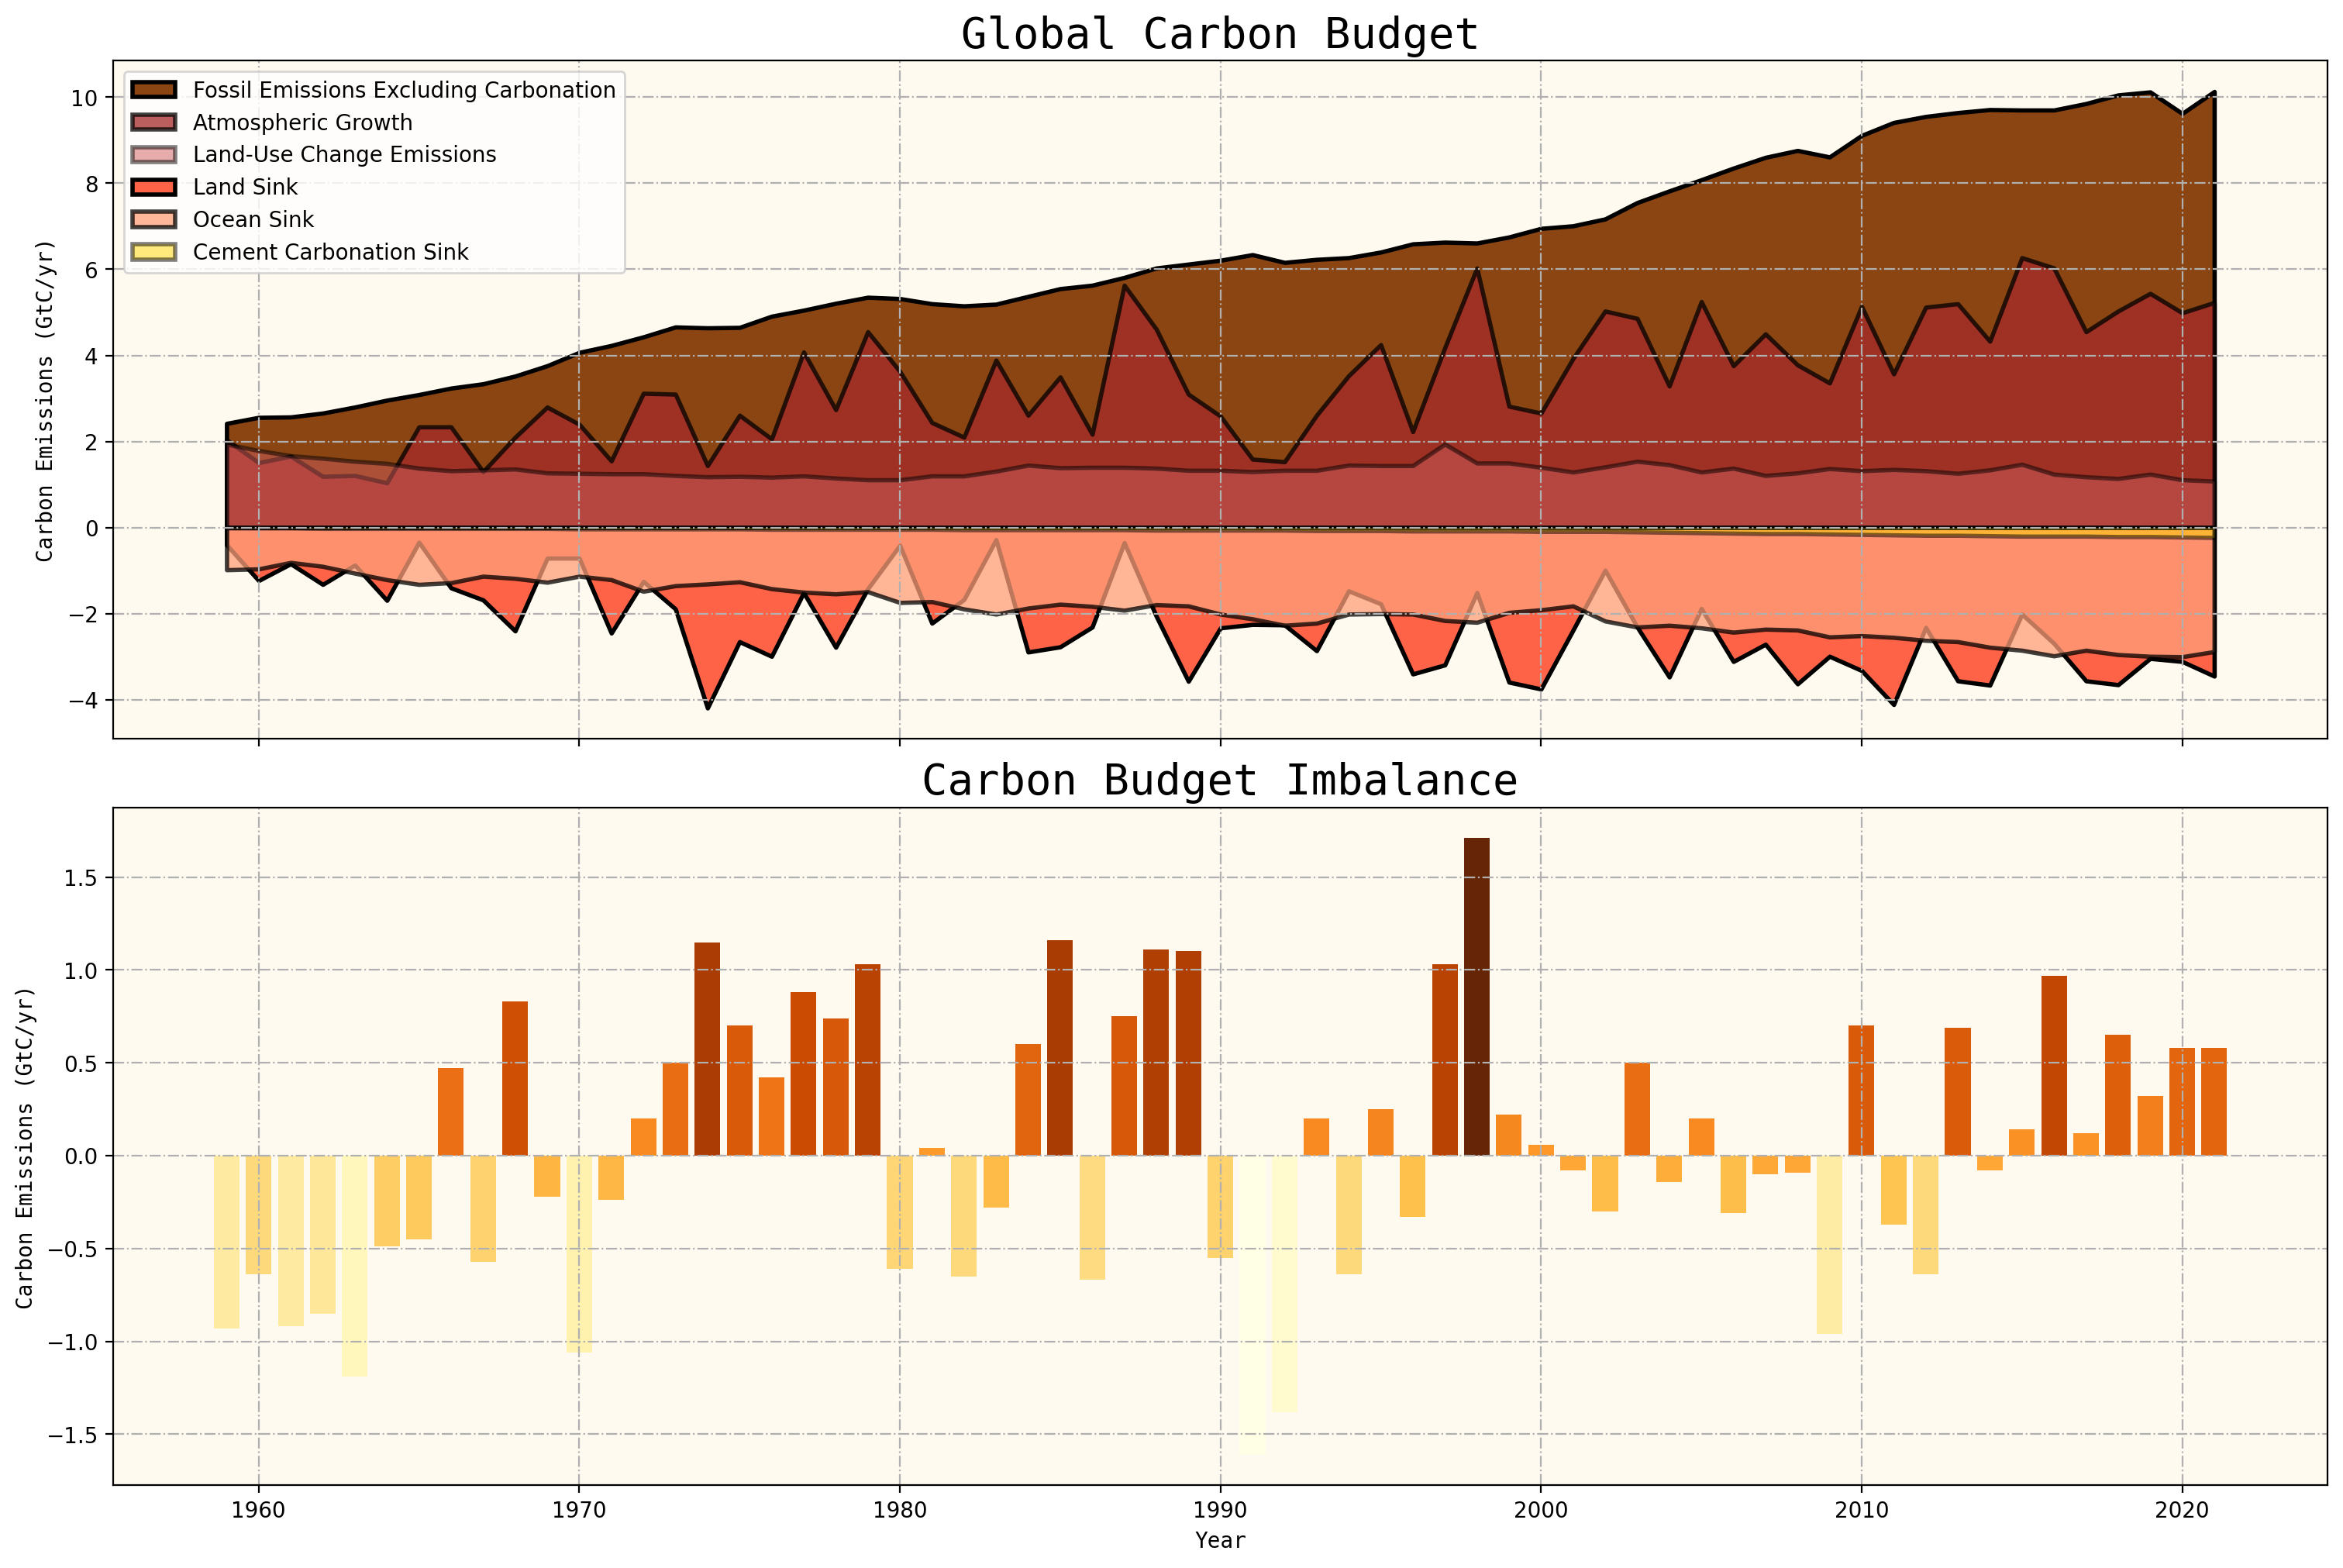

In [26]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10), sharex=True, layout='constrained')

colors = ['saddlebrown', 'brown', 'indianred', 'tomato', 'lightsalmon', 'peachpuff', 'gold', 'yellowgreen']

# Each data set is either completely positive or completely negative. We set up a fill between to compare them mmost effectively
ax[0].fill_between(global_carbon_budget['Year'],(global_carbon_budget['fossil emissions excluding carbonation']),0,
                   label='Fossil Emissions Excluding Carbonation', color=colors[0], edgecolor='k', linewidth=2)
ax[0].fill_between(global_carbon_budget['Year'],(global_carbon_budget['atmospheric growth']),0,
                  label='Atmospheric Growth', color=colors[1], alpha=.75, edgecolor='k', linewidth=2)
ax[0].fill_between(global_carbon_budget['Year'],(global_carbon_budget['land-use change emissions']),0,
                  label='Land-Use Change Emissions', color=colors[2], alpha=.5, edgecolor='k', linewidth=2)
ax[0].fill_between(global_carbon_budget['Year'],(global_carbon_budget['land sink']*-1),0,
                  label='Land Sink', color=colors[3], edgecolor='k', linewidth=2)
ax[0].fill_between(global_carbon_budget['Year'],(global_carbon_budget['ocean sink']*-1),0,
                  label='Ocean Sink', color=colors[4], alpha=.75,edgecolor='k', linewidth=2)
ax[0].fill_between(global_carbon_budget['Year'],(global_carbon_budget['cement carbonation sink']*-1),0,
                  label='Cement Carbonation Sink', color=colors[6], alpha=.5,edgecolor='k', linewidth=2)

ax[0].set_facecolor("floralwhite")
ax[0].legend(loc='upper left')
ax[0].set_title('Global Carbon Budget', fontsize=20, fontname='monospace')
ax[0].set_ylabel('Carbon Emissions (GtC/yr)', fontname='monospace')
# ax[0].set_xlabel('Year', fontname='monospace')
ax[0].grid(linestyle='-.')


### Set the values to be used in our colormap
norm = plt.Normalize(min(global_carbon_budget['budget imbalance']), 
                     max(global_carbon_budget['budget imbalance']))
cmap_amp = colormap.get_cmap('YlOrBr_r')
bar_colors_amp = cmap_amp(norm(global_carbon_budget['budget imbalance']))

ax[1].bar(global_carbon_budget['Year'],global_carbon_budget['budget imbalance']*-1, color=bar_colors_amp,)

ax[1].set_facecolor("floralwhite")
# ax[1].legend(loc='lower left')
ax[1].set_title('Carbon Budget Imbalance', fontsize=20, fontname='monospace')
ax[1].set_ylabel('Carbon Emissions (GtC/yr)', fontname='monospace')
ax[1].set_xlabel('Year', fontname='monospace')
ax[1].grid(linestyle='-.')

#### <center> Fig. 9. The above plots illustrate the relationship between carbon emissions and carbon uptake. In the first plot, anything above the x-axis is contributing to carbon emissions. Anything below the x-axis is acting as a carbon sink. As the second plot shows, there is more carbon being emitted than sequestered, so the net carbon budget is positive over the last decade and most of the last six decades </center>
    
#### <center> Fossil emissions excluding carbonation contribute to 41% of all emissions. Land sinks 15% or all emissions. The ocean sinks 13% of all emissions.

# <font color='red'>13. Global Mean Temperatures</font> 

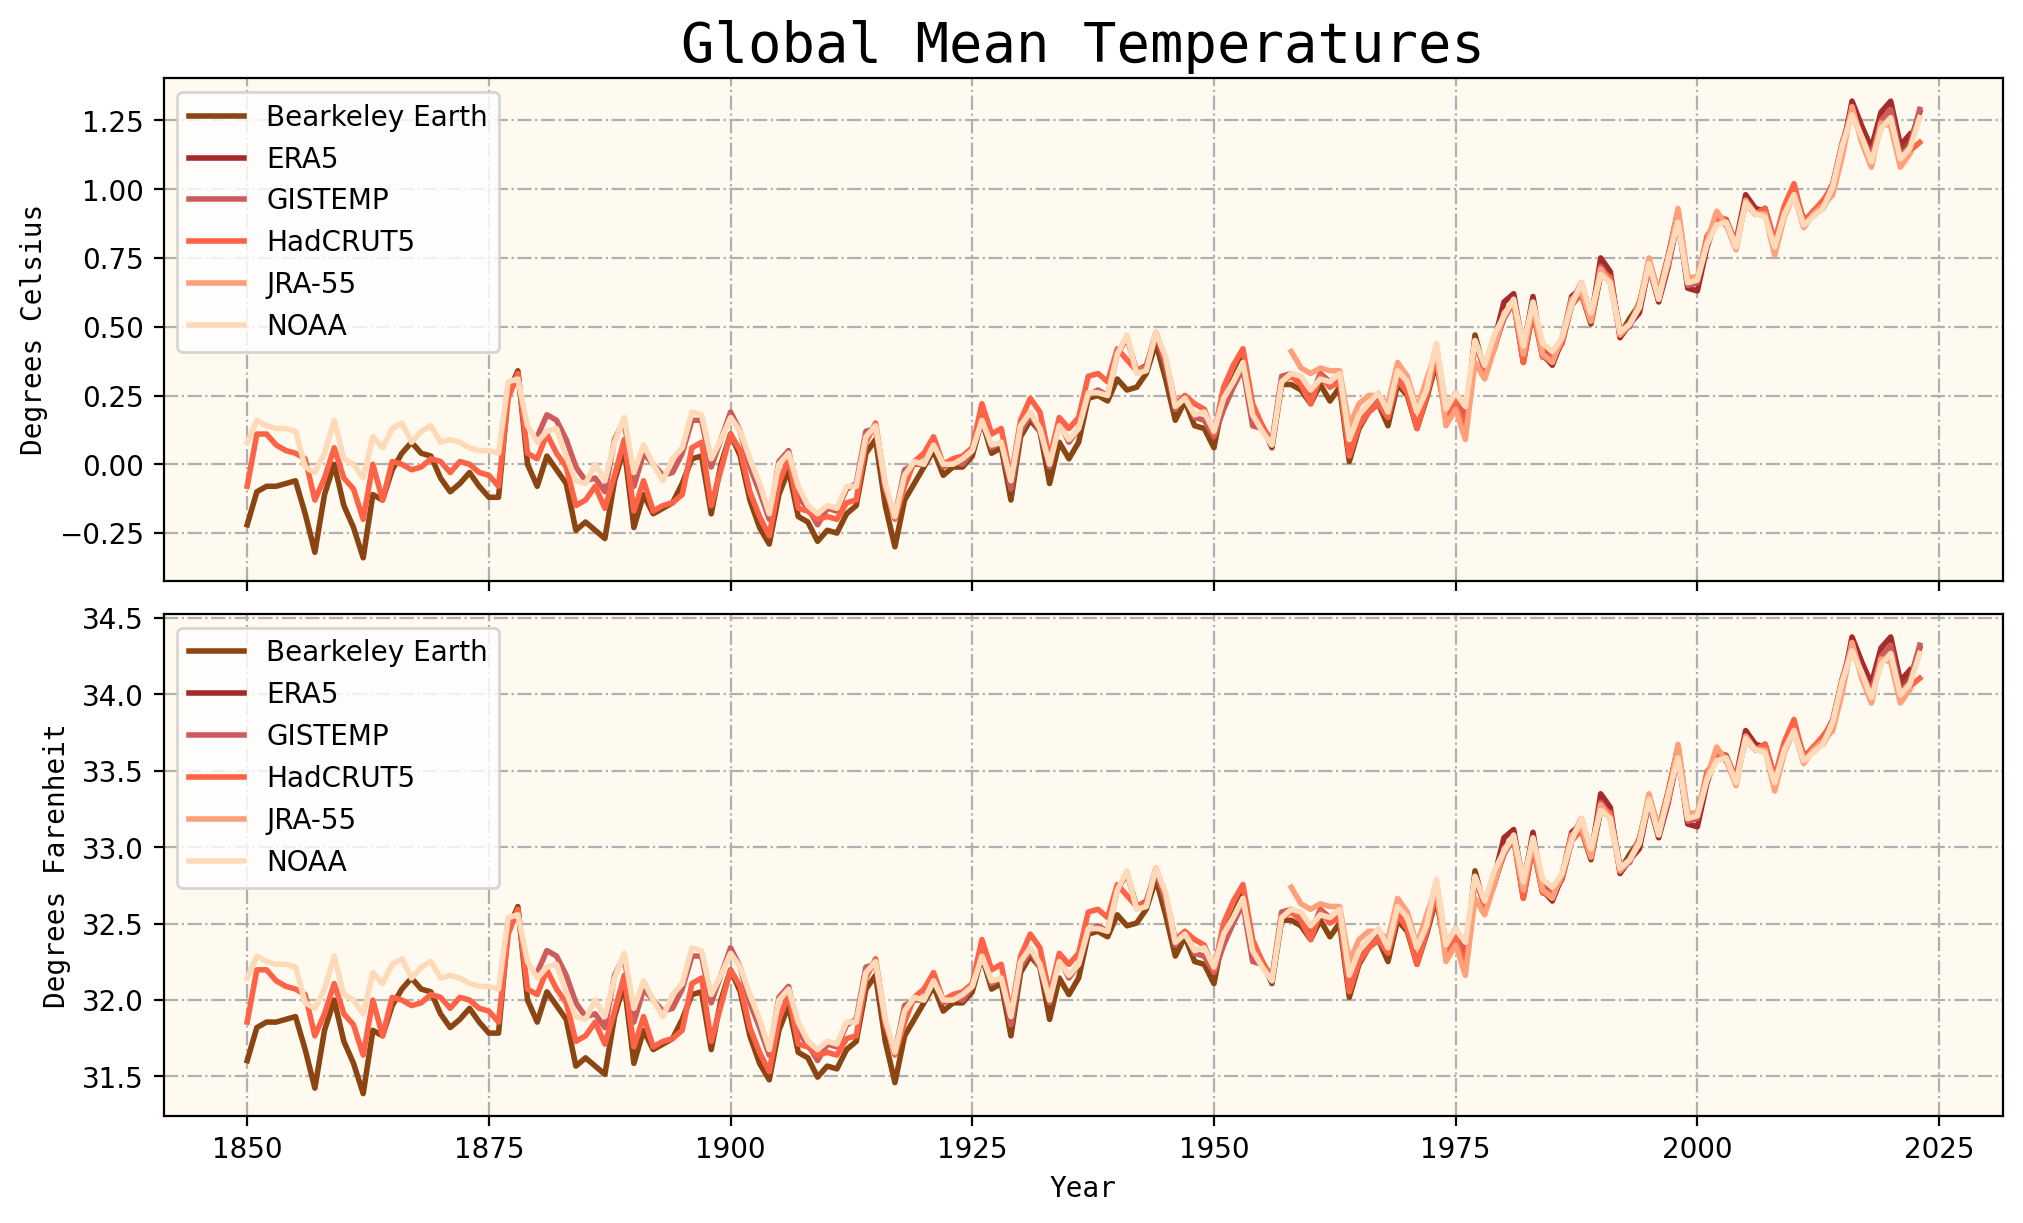

In [16]:
fig, ax = plt.subplots(nrows=2, figsize=(10,6), sharex=True, layout='constrained')

colors = ['saddlebrown', 'brown', 'indianred', 'tomato', 'lightsalmon', 'peachpuff', 'gold', 'yellowgreen']


ax[0].plot(gmt_temp_berk_earth['Year'],(gmt_temp_berk_earth['Berkeley Earth (degC)']),
                   label='Bearkeley Earth', color=colors[0], linewidth=2)

ax[0].plot(gmt_temp_era5['Year'],(gmt_temp_era5['ERA5 (degC)']),
                  label='ERA5', color=colors[1], linewidth=2)

ax[0].plot(gmt_temp_gistemp['Year'],(gmt_temp_gistemp['GISTEMP (degC)']),
                  label='GISTEMP', color=colors[2], linewidth=2)

ax[0].plot(gmt_temp_hadcrut5['Year'],(gmt_temp_hadcrut5['HadCRUT5 (degC)']),
                  label='HadCRUT5', color=colors[3], linewidth=2)

ax[0].plot(gmt_temp_jra55['Year'],(gmt_temp_jra55['JRA-55 (degC)']),
                  label='JRA-55', color=colors[4], linewidth=2)

ax[0].plot(gmt_temp_noaa_globaltemp['Year'],(gmt_temp_noaa_globaltemp['NOAAGlobalTemp (degC)']),
                  label='NOAA', color=colors[5], linewidth=2)

ax[0].set_facecolor("floralwhite")
ax[0].legend(loc='upper left')
ax[0].set_title('Global Mean Temperatures', fontsize=20, fontname='monospace')
ax[0].set_ylabel('Degrees Celsius', fontname='monospace')
# ax[0].set_xlabel('Year', fontname='monospace')
ax[0].grid(linestyle='-.')


ax[1].plot(gmt_temp_berk_earth['Year'],(gmt_temp_berk_earth['Berkeley Earth (degC)'] * (9/5) + 32),
                   label='Bearkeley Earth', color=colors[0], linewidth=2)

ax[1].plot(gmt_temp_era5['Year'],(gmt_temp_era5['ERA5 (degC)'] * (9/5) + 32),
                  label='ERA5', color=colors[1], linewidth=2)

ax[1].plot(gmt_temp_gistemp['Year'],(gmt_temp_gistemp['GISTEMP (degC)'] * (9/5) + 32),
                  label='GISTEMP', color=colors[2], linewidth=2)

ax[1].plot(gmt_temp_hadcrut5['Year'],(gmt_temp_hadcrut5['HadCRUT5 (degC)'] * (9/5) + 32),
                  label='HadCRUT5', color=colors[3], linewidth=2)

ax[1].plot(gmt_temp_jra55['Year'],(gmt_temp_jra55['JRA-55 (degC)'] * (9/5) + 32),
                  label='JRA-55', color=colors[4], linewidth=2)

ax[1].plot(gmt_temp_noaa_globaltemp['Year'],(gmt_temp_noaa_globaltemp['NOAAGlobalTemp (degC)'] * (9/5) + 32),
                  label='NOAA', color=colors[5], linewidth=2)

ax[1].set_facecolor("floralwhite")
ax[1].legend(loc='upper left')
# ax[1].set_title('Global Mean Temperatures', fontsize=20, fontname='monospace')
ax[1].set_ylabel('Degrees Farenheit', fontname='monospace')
ax[1].set_xlabel('Year', fontname='monospace')
ax[1].grid(linestyle='-.')

#### <center> Fig 10. Above is a time series of 6 different global mean temperature datasets. The first plot is in Celsius, and the second plot is in Farenheit. The datasets show there is a very strong agreement on global temperature measurements since about 1975. Going back from 1975 to the beginning of the datasets, 1850, the disagreement between the 6 datasets increases. This is because modern tools and satellites have improved the ability to make accurate climate measurements. </center>

#### <center> The baseline era for most global temperatures is 1951-1980. Global temperatures at this time, according to our datasets, were about 0.25ºC. Since 1980, temperatures have increased to about 1.25º C – a full 1ºC increase in global temperature over the last 53 years.

# <font color='red'>14. Land vs. Ocean</font> 

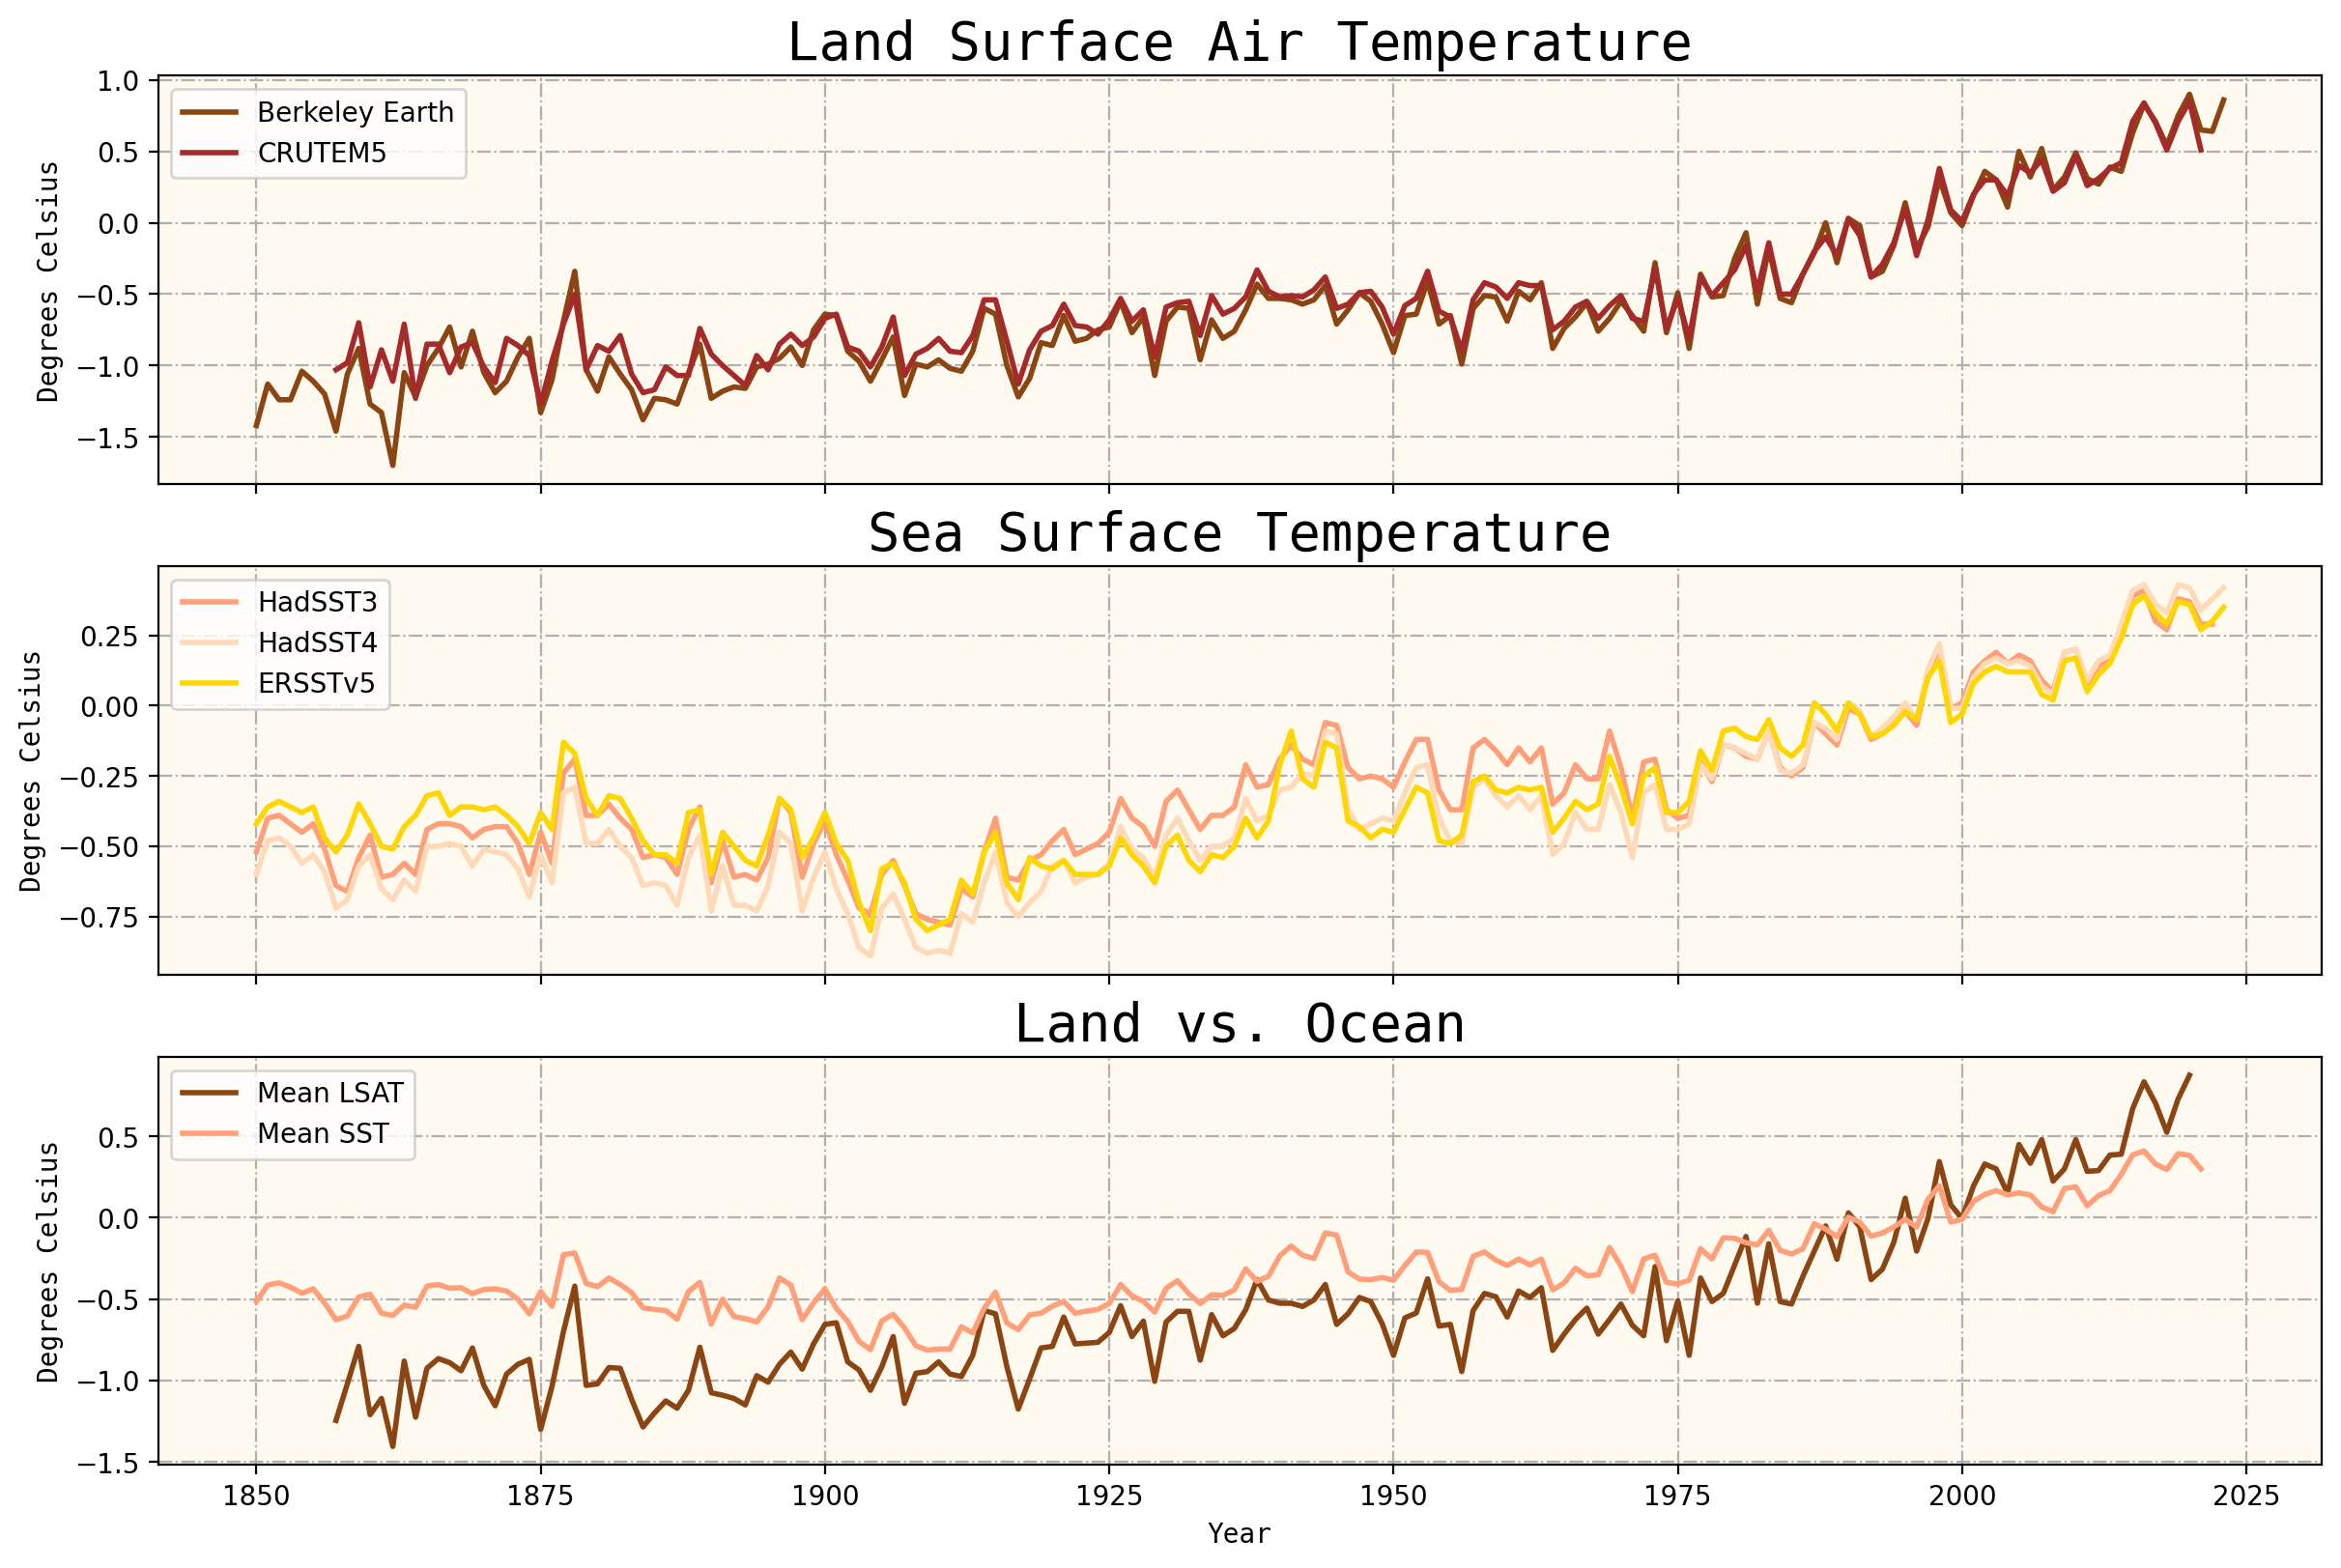

In [17]:
fig, ax = plt.subplots(nrows=3, figsize=(12,8), sharex=True, layout='constrained')

colors = ['saddlebrown', 'brown', 'lightsalmon', 'peachpuff', 'gold', 'yellowgreen']


ax[0].plot(lsat_temps_berk_earth['Year'],(lsat_temps_berk_earth['Berkeley Earth Land (degC)']),
                   label='Berkeley Earth', color=colors[0], linewidth=2)

ax[0].plot(lsat_temps_cutem5['Year'],(lsat_temps_cutem5['CRUTEM5 (degC)']),
                  label='CRUTEM5', color=colors[1], linewidth=2)

ax[0].set_facecolor("floralwhite")
ax[0].legend(loc='upper left')
ax[0].set_title('Land Surface Air Temperature', fontsize=20, fontname='monospace')
ax[0].set_ylabel('Degrees Celsius', fontname='monospace')
# ax[0].set_xlabel('Year', fontname='monospace')
ax[0].grid(linestyle='-.')

ax[1].plot(sst_hadsst3['Year'],(sst_hadsst3['HadSST3 (degC)']),
                  label='HadSST3', color=colors[2], linewidth=2)

ax[1].plot(sst_hadsst4['Year'],(sst_hadsst4['HadSST4 (degC)']),
                  label='HadSST4', color=colors[3], linewidth=2)

ax[1].plot(sst_ersstv5['Year'],(sst_ersstv5['ERSSTv5 (degC)']),
                  label='ERSSTv5', color=colors[4], linewidth=2)

ax[1].set_facecolor("floralwhite")
ax[1].legend(loc='upper left')
ax[1].set_title('Sea Surface Temperature', fontsize=20, fontname='monospace')
ax[1].set_ylabel('Degrees Celsius', fontname='monospace')
# ax[0].set_xlabel('Year', fontname='monospace')
ax[1].grid(linestyle='-.')

land_mean = (lsat_temps_berk_earth['Berkeley Earth Land (degC)'][7:171] + lsat_temps_cutem5['CRUTEM5 (degC)'][7:171]) / 2
ocean_mean = (sst_hadsst3['HadSST3 (degC)'][:172] + sst_hadsst4['HadSST4 (degC)'][:172] + sst_ersstv5['ERSSTv5 (degC)'][:172]) / 3
                                                                 

ax[2].plot(lsat_temps_berk_earth['Year'][7:171],(land_mean),
                   label='Mean LSAT', color=colors[0], linewidth=2)

ax[2].plot(sst_hadsst3['Year'][:172],(ocean_mean),
                  label='Mean SST', color=colors[2], linewidth=2)

ax[2].set_facecolor("floralwhite")
ax[2].legend(loc='upper left')
ax[2].set_title('Land vs. Ocean', fontsize=20, fontname='monospace')
ax[2].set_ylabel('Degrees Celsius', fontname='monospace')
ax[2].set_xlabel('Year', fontname='monospace')
ax[2].grid(linestyle='-.')

#### <center> Fig 11. The above plots show the differences between land surface air temperature and sea surface temperatures. There has been a clear increase in temperatures over both land and ocean, especially since about 1975. As the last plot shows, mean temperatures over land have increased greater than temperatures over the ocean because the ocean has a higher specific heat. In other words, it requires more energy to heat up the ocean than the land.

Text(0.5, 1.0, 'All Forcings')

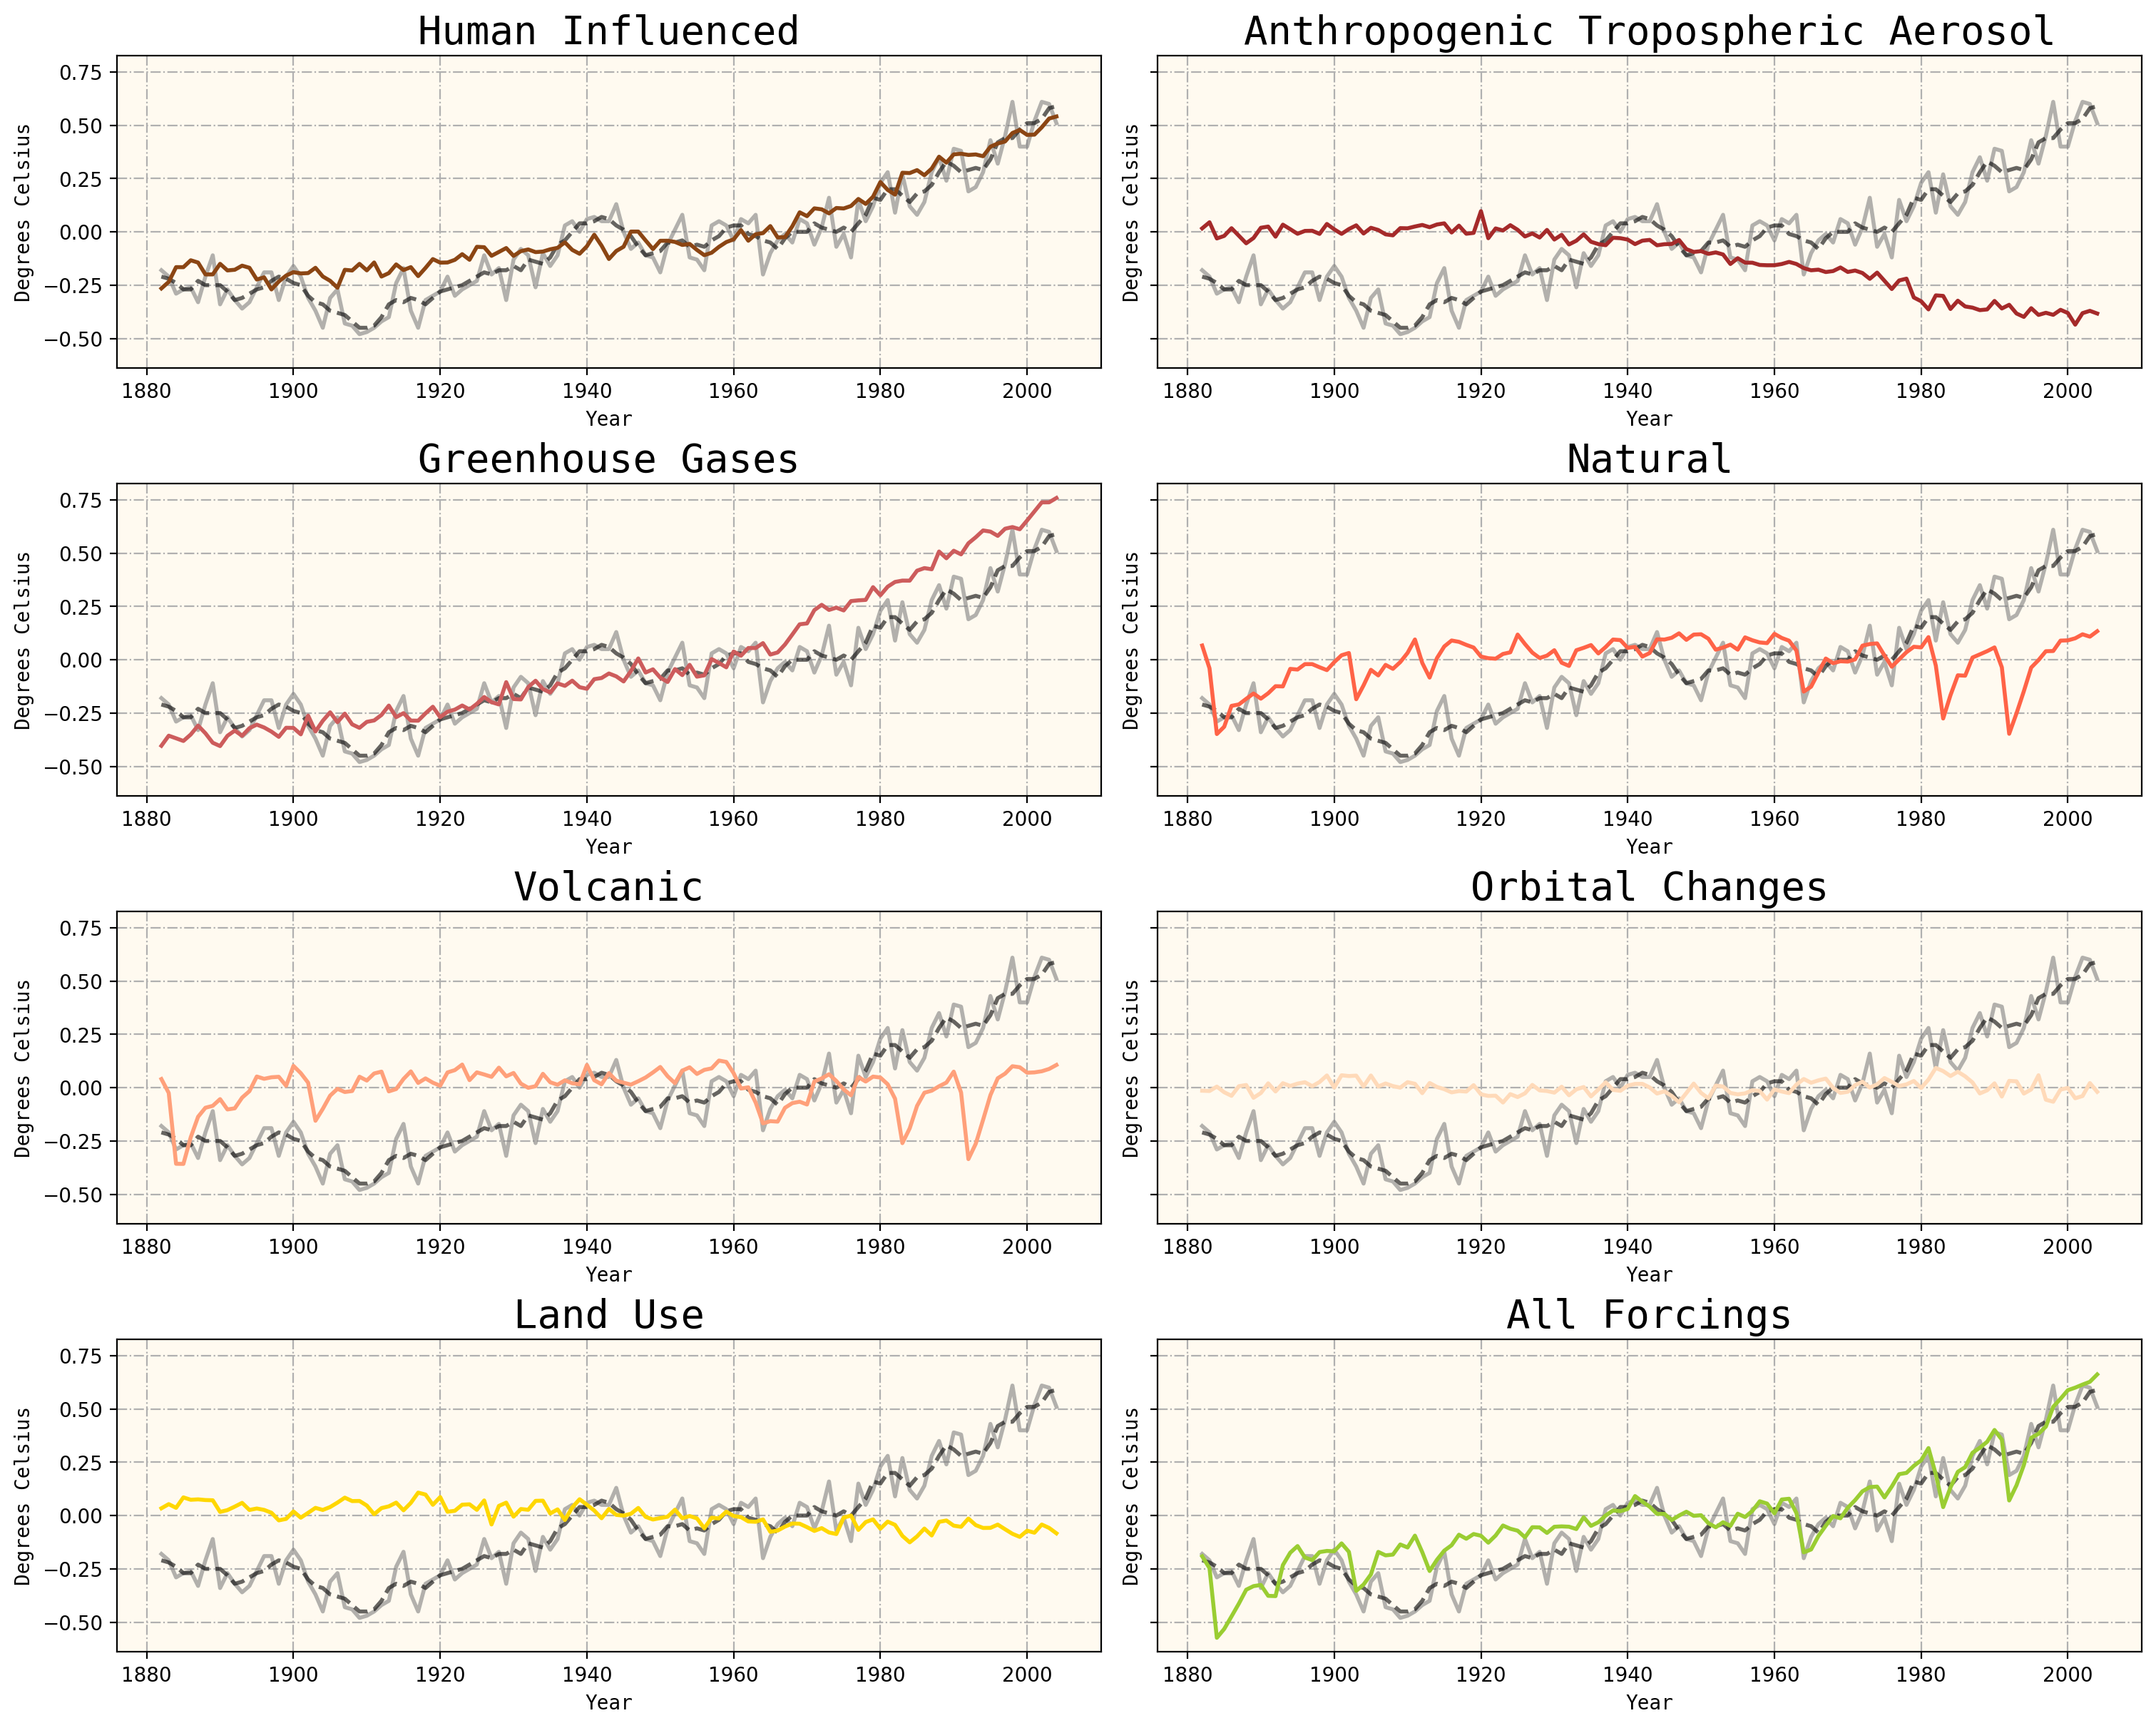

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15,12), layout='constrained', sharey=True)

colors = ['saddlebrown', 'brown', 'indianred', 'tomato', 'lightsalmon', 'peachpuff', 'gold', 'yellowgreen']

# loop assigns subplot
for i in range(2):
    for x in range(4):
        ax[x,i].plot(nasa_giss_observed_temps['Year'][2:125],(nasa_giss_observed_temps['Annual_Mean'][2:125]),
                      label='CRUTEM5', color='grey', linewidth=2, alpha=.6,)

        ax[x,i].plot(nasa_giss_observed_temps['Year'][2:125],(nasa_giss_observed_temps['5-year_Mean'][2:125]),
                      label='CRUTEM5', color='k', linestyle='--', linewidth=2, alpha=.6)


        ax[x,i].set_facecolor("floralwhite")
        # ax[x,i].legend(loc='upper left')
        
        ax[x,i].set_ylabel('Degrees Celsius', fontname='monospace')
        ax[x,i].set_xlabel('Year', fontname='monospace')
        ax[x,i].grid(linestyle='-.')

# Each forcing array is being normalized so that it is centered around 0. This makes it easier to compare its impact to the observed temperature anomaly
# arrays do not all cover the same time range, so they are sliced to only display where every array overlaps in time
ax[0,0].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Human'][32:155] - nasa_giss_response_to_forcing['Human'][32:155].mean()),
                  label='Human', color=colors[0], linewidth=2)
ax[0,0].set_title('Human Influenced', fontsize=20, fontname='monospace')

ax[0,1].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Anthropogenic tropospheric aerosol'][32:155] - nasa_giss_response_to_forcing['Land use'][32:155].mean()),
                  label='Anthropogenic Tropospheric Aerosol', color=colors[1], linewidth=2)
ax[0,1].set_title('Anthropogenic Tropospheric Aerosol', fontsize=20, fontname='monospace')

ax[1,0].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Greenhouse gases'][32:155] - nasa_giss_response_to_forcing['Greenhouse gases'][32:155].mean()),
                  label='Greenhouse Gases', color=colors[2], linewidth=2)
ax[1,0].set_title('Greenhouse Gases', fontsize=20, fontname='monospace')

ax[1,1].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Natural'][32:155] - nasa_giss_response_to_forcing['Natural'][32:155].mean()),
                  label='Natural', color=colors[3], linewidth=2)
ax[1,1].set_title('Natural', fontsize=20, fontname='monospace')

ax[2,0].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Volcanic'][32:155] - nasa_giss_response_to_forcing['Volcanic'][32:155].mean()),
                  label='Volcanic', color=colors[4], linewidth=2)
ax[2,0].set_title('Volcanic', fontsize=20, fontname='monospace')

ax[2,1].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Orbital changes'][32:155] - nasa_giss_response_to_forcing['Orbital changes'][32:155].mean()),
                  label='Orbital Changes', color=colors[5], linewidth=2)
ax[2,1].set_title('Orbital Changes', fontsize=20, fontname='monospace')

ax[3,0].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['Land use'][32:155] - nasa_giss_response_to_forcing['Land use'][32:155].mean()),
                  label='Land Use', color=colors[6], linewidth=2)
ax[3,0].set_title('Land Use', fontsize=20, fontname='monospace')

ax[3,1].plot(nasa_giss_response_to_forcing['Year'][32:155],(nasa_giss_response_to_forcing['All forcings'][32:155] - nasa_giss_response_to_forcing['All forcings'][32:155].mean()),
                   label='All Forcings', color=colors[7], linewidth=2)
ax[3,1].set_title('All Forcings', fontsize=20, fontname='monospace')

#### <center> Fig 12. Individual climate forcings from NOAA's GISS Model-E2 compared to the NOAA's observed temperatures over the same time period. The simulations branch from a historical experiment that runs from 1850-2005. Only 1880-2005 is considered because that is the full range of the observed temperatures. In each simulation, only one parameter is changed as designated by the title of each panel. The line reflects the impact that each parameter had on global temperature. In the final panel, every forcings is combined. The "All Forcings" time series matches closely with the observed temperatures, as one would expect. However, as stand-alone perturbations, the "Human Influenced" time series and the "Greenhouse Gases" time series also closely resemble the observed temperatures. This suggest they dominate the overall signal compared to the rest of the forcings. All temperature impacts from the forcings are normalized to reflect the temperature anomaly. 

# Conclusion

#### This document provides several lines of evidence that the climate is not only changing for the worse, but it is changing as a result of anthropogenic influence. The common theme of the visualizations throughout this document is that climate responses almost all share an upward trend, especially since the mid-20th century. Increases in greenhouse gases are the primary driver of these changes. If you take one of the graphs of CO2 as an example, you can see both natural climate variation and anthropogenic climate influences. The evolution of CO2 over the last century is a perfect example of how humanity has drowned out most of the natural climate cycle that is shown on a seasonal scale. The final grid of plots (Fig. 12) further demonstrates how dominant the human contributed greenhouse gases are over other natural climate variations like orbital changes. It is important for people outside of science to see and understand these trends so that we can continue to change our ways and reverse our impact on the climate.